In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Lending_Club_Loan_Defaulter.csv')

In [104]:
df.head(1)

,id,loan_amnt,loan_amt_category,term,int_rate,int_rate_category,grade,sub_grade,emp_length,home_ownership,...,delinq_2yrs,delinq_2yrs_category,earliest_cr_line,open_acc,open_acc_category,pub_rec,revol_util,revol_util_category,total_acc,default_flag
0,112435993,2300,Very Low (1000–5000),36 months,12.62,Low (10.01–15),C,C1,10+ years,OWN,...,0,No Delinquencies (0),1985-09-01,4,Few (4–6),0,55.1,Moderate (51–75),6,0


In [105]:
df.tail(1)

,id,loan_amnt,loan_amt_category,term,int_rate,int_rate_category,grade,sub_grade,emp_length,home_ownership,...,delinq_2yrs,delinq_2yrs_category,earliest_cr_line,open_acc,open_acc_category,pub_rec,revol_util,revol_util_category,total_acc,default_flag
759337,65744272,5000,Very Low (1000–5000),36 months,11.22,Low (10.01–15),B,B5,7 years,MORTGAGE,...,0,No Delinquencies (0),2005-07-01,6,Few (4–6),1,48.0,Low (26–50),8,0


In [5]:
# Column Name	Description
# loan_amnt -	The amount of money the borrower requested
# term -	The number of months to repay the loan (e.g., 36 or 60)
# int_rate -	Interest rate on the loan
# grade -	Loan grade assigned by Lending Club (A to G)
# sub_grade -	More granular rating (A1 to G5)
# emp_length - Employment length in years of borrower
# home_ownership - Indicates whether borrower owns, rents, or has a mortgage
# annual_inc - Borrower's annual income
# dti - Debt-to-income ratio
# delinq_2yrs	- Number of times borrower was 30+ days past due in the past 2 years
# purpose	- The purpose of the loan (Credit Card is more about using a loan to pay off credit card debt,Debt Consolidation is about combining multiple debts into one loan.
# Renewable Energy is for financing sustainable energy projects like solar panels or wind turbines.)
# addr_state	- State of residence
# loan_status	- Final loan status ( Charged Off - Loan likely no recovery for the lender
# Current	Loan is up to date with payments	Ideal, no overdue balance
# Default	Loan is overdue and payments haven’t been made for 90+ days	Serious delinquency, likely leads to charge-off
# Fully Paid	Loan has been paid off in full	Positive, borrower has successfully repaid the loan
# In Grace Period	Payment is missed, but borrower is within grace period	Short-term delay, can still make payments without penalty
# Late 16-30 Days	Loan is 16–30 days overdue	Early delinquency, borrower likely to face late fees
# Late 31-120 Days	Loan is 31–120 days overdue	Significant delinquency, further action may be taken by lender) — used to create target var
# issue_d	- Loan issue date
# earliest_cr_line	- Date of the borrower's earliest credit line
# revol_util	- Revolving line utilization rate (credit card usage)
# total_acc	- Total number of credit accounts
# open_acc	- Number of open credit lines
# pub_rec	- Number of derogatory public records
# verification_status	- Whether income & details was verified (Source Verified - 3rd party service)
# application_type - Individual vs. joint application

In [6]:
df.columns

Index(['id', 'loan_amnt', 'loan_amt_category', 'term', 'int_rate',
       'int_rate_category', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'annual_inc_category',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'dti_category', 'delinq_2yrs',
       'delinq_2yrs_category', 'earliest_cr_line', 'open_acc',
       'open_acc_category', 'pub_rec', 'revol_util', 'revol_util_category',
       'total_acc'],
      dtype='object')

In [7]:
df.describe()

,id,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc
count,7.593380e+05,759338.000000,759338.000000,7.593380e+05,758983.000000,759338.000000,759338.000000,759338.000000,758821.000000,759338.000000
mean,9.317508e+07,14707.775260,13.187041,7.996778e+04,18.980803,0.357795,11.822423,0.244998,49.955193,24.136807
std,1.536975e+07,9215.456493,5.054311,1.634141e+05,13.363398,0.951763,5.771757,0.660138,24.310492,11.955676
min,5.571600e+04,1000.000000,5.320000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,7.880009e+07,7500.000000,9.750000,4.800000e+04,12.260000,0.000000,8.000000,0.000000,31.500000,15.000000
50%,9.279886e+07,12000.000000,12.620000,6.700000e+04,18.180000,0.000000,11.000000,0.000000,49.600000,22.000000
75%,1.072904e+08,20000.000000,15.590000,9.500000e+04,24.780000,0.000000,15.000000,0.000000,68.400000,31.000000
max,1.201229e+08,40000.000000,30.990000,1.100000e+08,999.000000,42.000000,97.000000,61.000000,173.200000,176.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    759338 non-null  int64  
 1   loan_amnt             759338 non-null  int64  
 2   loan_amt_category     759338 non-null  object 
 3   term                  759338 non-null  object 
 4   int_rate              759338 non-null  float64
 5   int_rate_category     759338 non-null  object 
 6   grade                 759338 non-null  object 
 7   sub_grade             759338 non-null  object 
 8   emp_length            708975 non-null  object 
 9   home_ownership        759338 non-null  object 
 10  annual_inc            759338 non-null  float64
 11  annual_inc_category   759338 non-null  object 
 12  verification_status   759338 non-null  object 
 13  issue_d               759338 non-null  object 
 14  loan_status           759338 non-null  object 
 15  

In [9]:
df.dtypes

id                        int64
loan_amnt                 int64
loan_amt_category        object
term                     object
int_rate                float64
int_rate_category        object
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
annual_inc_category      object
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
dti_category             object
delinq_2yrs               int64
delinq_2yrs_category     object
earliest_cr_line         object
open_acc                  int64
open_acc_category        object
pub_rec                   int64
revol_util              float64
revol_util_category      object
total_acc                 int64
dtype: object

# LOAN AMOUNT

In [10]:
# # Define bins and labels
# bins = [0, 5000, 10000, 20000, 30000, 40000, float('inf')]
# labels = ['<5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '>40k']

# # Apply categorization
# df['loan_amount_category'] = pd.cut(df['loan_amnt'], bins=bins, labels=labels)
# df['loan_amount_category']

# INTEREST RATE

In [11]:
# # Define bins and labels
# bins = [0, 8, 12, 16, 20, 25, float('inf')]
# labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extreme']

# # Apply categorization
# df['int_rate_category'] = pd.cut(df['int_rate'], bins=bins, labels=labels)
# df['int_rate_category']

# EMP_LENGTH

In [12]:
df['emp_length'] 

0               NaN
1         10+ years
2           7 years
3         10+ years
4         10+ years
            ...    
759333     < 1 year
759334          NaN
759335    10+ years
759336    10+ years
759337      7 years
Name: emp_length, Length: 759338, dtype: object

In [13]:
df['emp_length'].isna().sum()

50363

In [14]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])
df['emp_length']

0         10+ years
1         10+ years
2           7 years
3         10+ years
4         10+ years
            ...    
759333     < 1 year
759334    10+ years
759335    10+ years
759336    10+ years
759337      7 years
Name: emp_length, Length: 759338, dtype: object

# ANNUAL INCOME

In [15]:
df['annual_inc'] = pd.to_numeric(df['annual_inc'])
df['annual_inc']

0         10000.0
1         94000.0
2         46350.0
3         44000.0
4         85000.0
           ...   
759333    38000.0
759334    32640.0
759335    47000.0
759336    87800.0
759337    65000.0
Name: annual_inc, Length: 759338, dtype: float64

In [16]:
# bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, 250000, 500000, float('inf')]
# labels = ['Very Low', 'Low', 'Below Average', 'Average', 'Above Average', 'High', 'Very High', 'Upper Elite', 'Outlier Elite']

# # Apply categorization
# df['annual_inc_category'] = pd.cut(df['annual_inc'], bins=bins, labels=labels)
# df['annual_inc_category']

# ISUUE DATE

In [17]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_d']

0        2017-06-01
1        2017-06-01
2        2017-06-01
3        2017-06-01
4        2017-06-01
            ...    
759333   2016-01-01
759334   2016-01-01
759335   2016-01-01
759336   2016-01-01
759337   2016-01-01
Name: issue_d, Length: 759338, dtype: datetime64[ns]

# DTI

In [18]:
df['dti'].isna().sum()

355

In [19]:
df['dti'] = df['dti'].fillna(df['dti'].median())
df['dti']

0         21.61
1         25.61
2          8.88
3         27.06
4          6.79
          ...  
759333    12.35
759334    22.76
759335    19.64
759336    12.10
759337     3.10
Name: dti, Length: 759338, dtype: float64

In [20]:
# # Define DTI ranges and labels
# dti_bins = [0, 10, 20, 30, 40, 50, 100]
# dti_labels = ['Excellent (0-10%)', 'Good (10-20%)', 'Fair (20-30%)', 'Risky (30-40%)', 'Very Risky (40-50%)', 'Critical (50%+)']

# # Apply binning
# df['dti_category'] = pd.cut(df['dti'], bins=dti_bins, labels=dti_labels, right=False)
# df['dti_category']

# DELINQUENCY

In [21]:
# bins = [-1, 0, 2, 5, 10, 50]
# labels = ['No Delinquency', 'Low (1–2)', 'Moderate (3–5)', 'High (6–10)', 'Very High (10+)']

# df['delinq_2yrs_cat'] = pd.cut(df['delinq_2yrs'], bins=bins, labels=labels)
# df['delinq_2yrs_cat']

# EARLIEST CR LINE

In [22]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line']

0        1985-09-01
1        1992-06-01
2        2002-06-01
3        2007-01-01
4        2002-02-01
            ...    
759333   2006-02-01
759334   1997-09-01
759335   1976-10-01
759336   2005-11-01
759337   2005-07-01
Name: earliest_cr_line, Length: 759338, dtype: datetime64[ns]

# OPEN ACCOUNT

In [23]:
# ibins = [-1, 0, 5, 10, 20, 100]
# labels = ['None', 'Low (1–5)', 'Moderate (6–10)', 'High (11–20)', 'Very High (21+)']
# df['open_acc_cat'] = pd.cut(df['open_acc'], bins=bins, labels=labels)
# df['open_acc_cat']

# REVOL UTIL

In [24]:
df['revol_util'].isna().sum()

517

In [25]:
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())
df['revol_util']

0          55.1
1         105.8
2          44.9
3          18.7
4          88.0
          ...  
759333     36.8
759334     37.1
759335     56.0
759336     53.2
759337     48.0
Name: revol_util, Length: 759338, dtype: float64

In [26]:
# bins = [-1, 30, 60, 100, np.inf]
# labels = ['Low (0–30%)', 'Medium (31–60%)', 'High (61–100%)', 'Overuse (>100%)']

# df['revol_util_cat'] = pd.cut(df['revol_util'], bins=bins, labels=labels)
# df['revol_util_cat']

# CLEANED DATASET

In [27]:
df.to_csv('Lending_Club_Loan_Defaulters.csv', index=False)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    759338 non-null  int64         
 1   loan_amnt             759338 non-null  int64         
 2   loan_amt_category     759338 non-null  object        
 3   term                  759338 non-null  object        
 4   int_rate              759338 non-null  float64       
 5   int_rate_category     759338 non-null  object        
 6   grade                 759338 non-null  object        
 7   sub_grade             759338 non-null  object        
 8   emp_length            759338 non-null  object        
 9   home_ownership        759338 non-null  object        
 10  annual_inc            759338 non-null  float64       
 11  annual_inc_category   759338 non-null  object        
 12  verification_status   759338 non-null  object        
 13 

# BINNING IN EXCEL 

## EXCEL FORMULAS FOR EACH CATEGORY CREATED

In [29]:
# Annual Income
=IF(A2<=100000, "Very Low (0-1L)", 
 IF(A2<=300000, "Low (1L-3L)",
 IF(A2<=500000, "Lower-Mid (3L-5L)",
 IF(A2<=1000000, "Mid (5L-10L)",
 IF(A2<=2000000, "Upper-Mid (10L-20L)",
 IF(A2<=5000000, "High (20L-50L)",
 IF(A2<=8900000, "Very High (50L-89L)", "Above 89L")))))))
# DTI
=IF(B2=-1, "Unknown",
 IF(B2<=5, "Very Low (0–5)",
 IF(B2<=10, "Low (5–10)",
 IF(B2<=20, "Moderate (10–20)",
 IF(B2<=30, "High (20–30)",
 IF(B2<=50, "Very High (30–50)",
 IF(B2<=999, "Risky (>50)", "Invalid (>999)")))))))
# Open Account 
=IF(C2=0, "No Accounts",
 IF(C2<=3, "Very Few (1–3)",
 IF(C2<=6, "Few (4–6)",
 IF(C2<=10, "Moderate (7–10)",
 IF(C2<=20, "Many (11–20)",
 IF(C2<=40, "Very Many (21–40)", "Extremely Many (41+)")))))
# revol_util
=IF(D2=0, "No Usage (0)",
 IF(D2<=25, "Very Low (0–25)",
 IF(D2<=50, "Low (26–50)",
 IF(D2<=75, "Moderate (51–75)",
 IF(D2<=100, "High (76–100)",
 "Very High (>100)")))))
# int_rate
=IF(E2<=10, "Very Low (5.32–10)",
 IF(E2<=15, "Low (10.01–15)",
 IF(E2<=20, "Moderate (15.01–20)",
 IF(E2<=25, "High (20.01–25)",
 "Very High (>25)"))))
# loan_amount
=IF(F2<=5000, "Very Low (1000–5000)",
 IF(F2<=10000, "Low (5001–10000)",
 IF(F2<=20000, "Moderate (10001–20000)",
 IF(F2<=30000, "High (20001–30000)",
 "Very High (30001–40000)"))))
# Delinq_2yrs
 =IF(G2=0, "No Delinquencies (0)",
 IF(G2=1, "One Delinquency (1)",
 IF(G2<=3, "Few Delinquencies (2–3)",
 IF(G2<=6, "Several Delinquencies (4–6)",
 IF(G2<=10, "Many Delinquencies (7–10)",
 IF(G2<=20, "High Delinquencies (11–20)",
 "Very High Delinquencies (21+)"))))))

SyntaxError: invalid syntax (4003282218.py, line 2)

# EDA

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    759338 non-null  int64         
 1   loan_amnt             759338 non-null  int64         
 2   loan_amt_category     759338 non-null  object        
 3   term                  759338 non-null  object        
 4   int_rate              759338 non-null  float64       
 5   int_rate_category     759338 non-null  object        
 6   grade                 759338 non-null  object        
 7   sub_grade             759338 non-null  object        
 8   emp_length            759338 non-null  object        
 9   home_ownership        759338 non-null  object        
 10  annual_inc            759338 non-null  float64       
 11  annual_inc_category   759338 non-null  object        
 12  verification_status   759338 non-null  object        
 13 

# UNIVARIATE ANALYSIS

In [106]:
df['loan_amnt'].value_counts().sort_values(ascending = False).head()

loan_amnt
10000    57780
12000    41634
20000    40542
15000    38698
5000     31012
Name: count, dtype: int64

In [107]:
loan_amt_counts = df['loan_amt_category'].value_counts().sort_values(ascending = False)
loan_amt_counts

loan_amt_category
Moderate (10001–20000)     268086
Low (5001–10000)           204234
High (20001–30000)         118407
Very Low (1000–5000)       111790
Very High (30001–40000)     56821
Name: count, dtype: int64

In [109]:
sns.set_style("darkgrid")
sns.set_palette("viridis") 

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\2552837288.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count' , y ='loan_amt_category', data=loan_amt_df, palette='viridis')


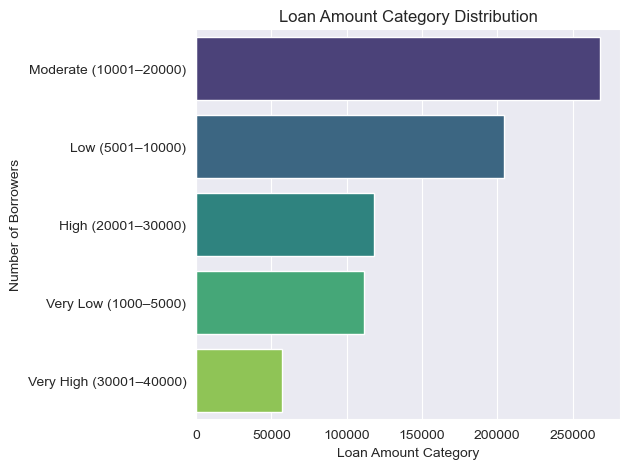

In [110]:
loan_amt_df = loan_amt_counts.reset_index()
loan_amt_df.columns = ['loan_amt_category', 'count']

# Bar Plot
sns.barplot(x='count' , y ='loan_amt_category', data=loan_amt_df, palette='viridis')
plt.title('Loan Amount Category Distribution')
plt.xlabel('Loan Amount Category')
plt.ylabel('Number of Borrowers')

plt.tight_layout()
plt.show()

In [111]:
term_counts = df['term'].value_counts().sort_values(ascending = False).head()
term_counts

term
36 months    561237
60 months    198101
Name: count, dtype: int64

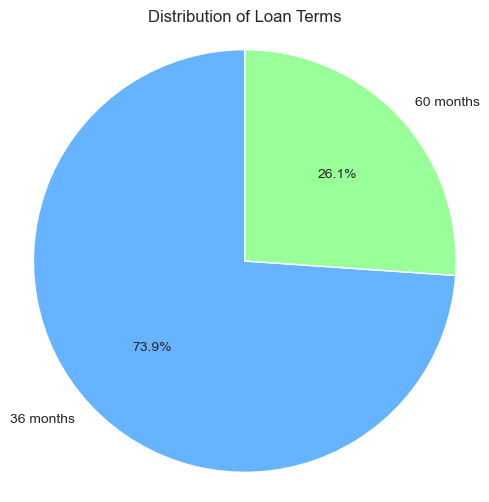

In [112]:
# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Loan Terms')
plt.axis('equal')  # Ensures the pie is circular
plt.show()

In [113]:
top_int_rates = df['int_rate'].value_counts().sort_values(ascending = False).head(10)
top_int_rates

int_rate
5.32     31350
11.49    28898
11.99    26349
13.99    23961
13.49    23236
12.74    19991
10.49    18003
18.99    15358
14.99    15005
8.24     14760
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\555331354.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Interest Rate', y='Count', data=top_int_rates_df, palette='viridis')


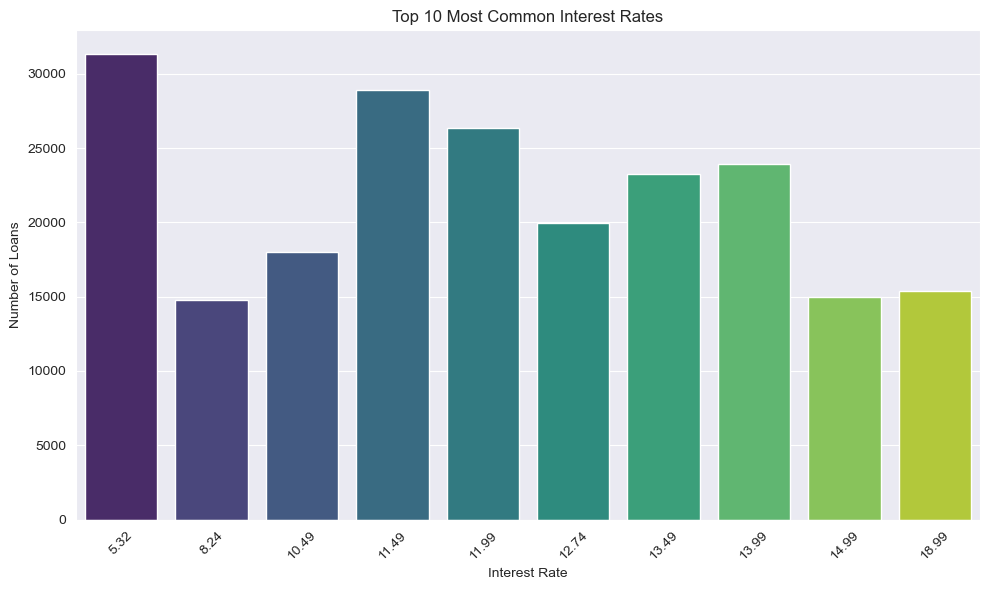

In [114]:
# Convert to DataFrame for plotting
top_int_rates_df = top_int_rates.reset_index()
top_int_rates_df.columns = ['Interest Rate', 'Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Interest Rate', y='Count', data=top_int_rates_df, palette='viridis')

plt.title('Top 10 Most Common Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [115]:
top_10 = df['int_rate_category'].value_counts().sort_values(ascending = False).head(10)
top_10

int_rate_category
Low (10.01–15)         329026
Very Low (5.32–10)     213303
Moderate (15.01–20)    151430
High (20.01–25)         40166
Very High (>25)         25413
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\940527587.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_df, x='count', y='int_rate_category', palette='viridis')


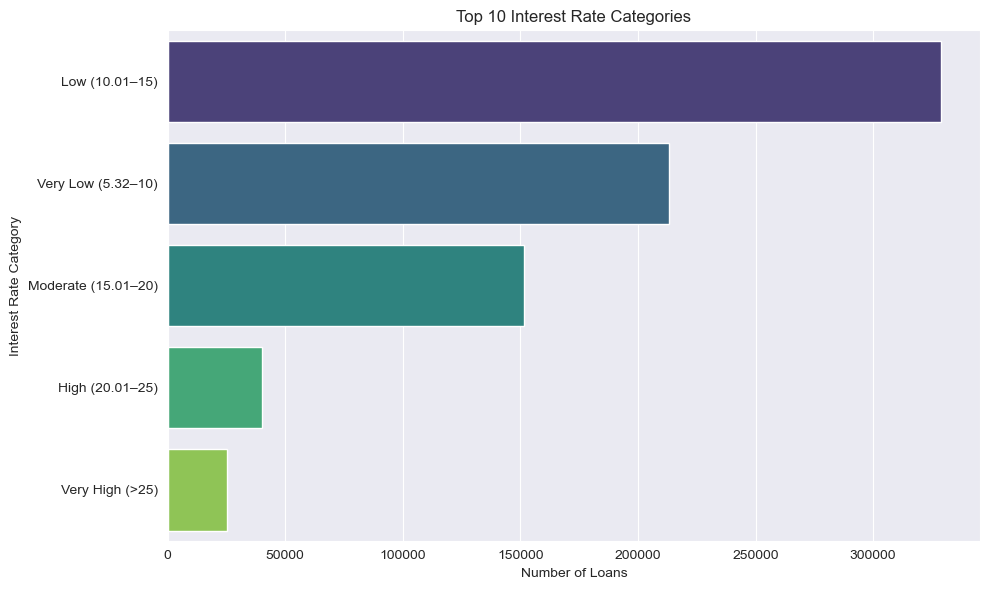

In [116]:
# Convert to DataFrame for plotting
top_10_df = top_10.reset_index()
top_10_df.columns = ['int_rate_category', 'count']

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_df, x='count', y='int_rate_category', palette='viridis')
plt.title('Top 10 Interest Rate Categories')
plt.xlabel('Number of Loans')
plt.ylabel('Interest Rate Category')
plt.tight_layout()
plt.show()

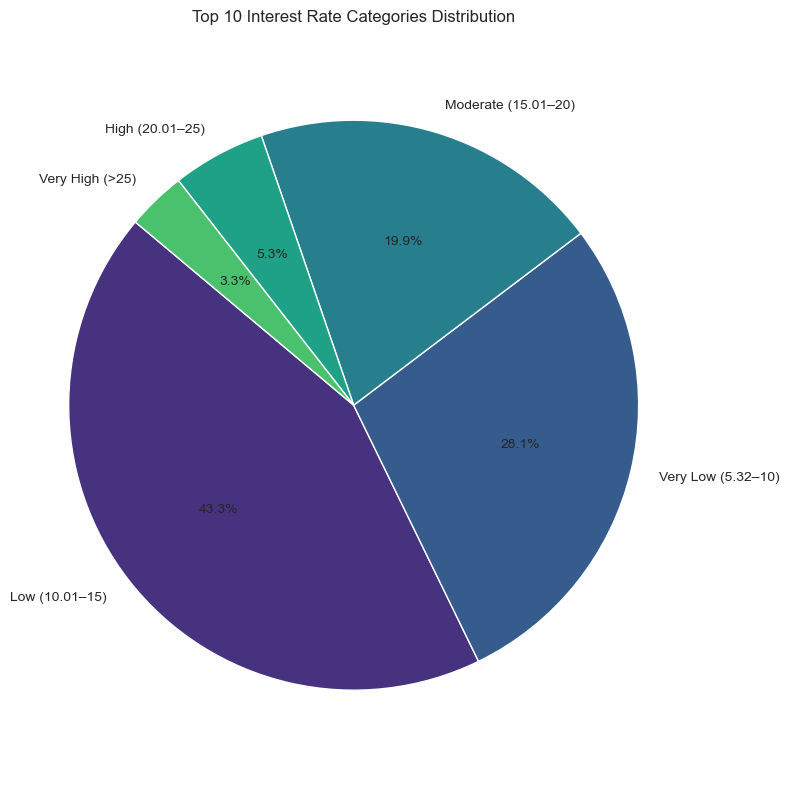

In [117]:
# Plot
plt.figure(figsize=(8, 8))
plt.pie(top_10.values, labels=top_10.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Interest Rate Categories Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [118]:
grade_counts = df['grade'].value_counts().sort_values(ascending = False)
grade_counts

grade
C    244903
B    230807
A    124517
D     97958
E     41254
F     14362
G      5537
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\181603995.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grade_counts.index, y=grade_counts.values, palette="viridis")


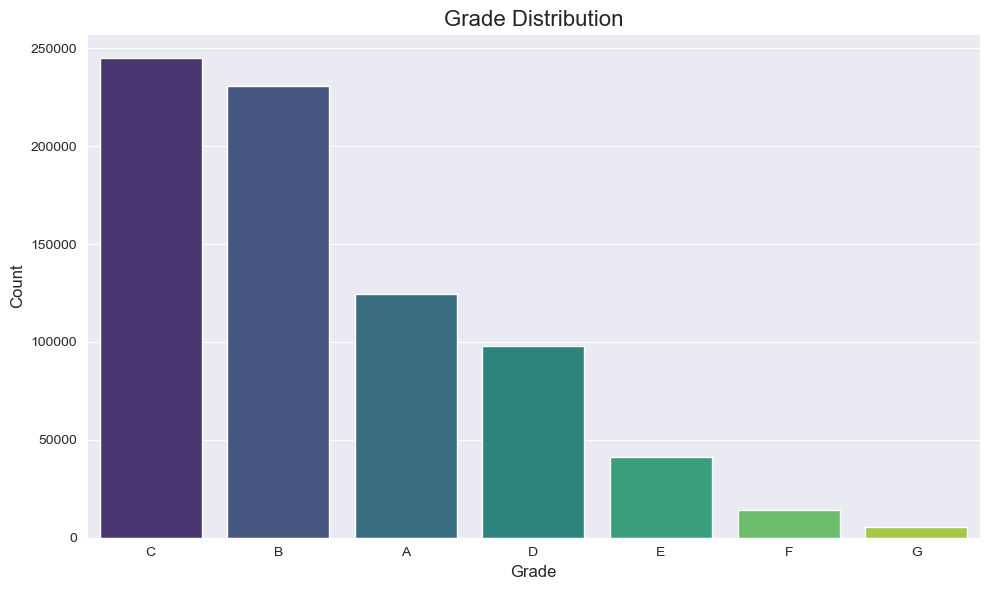

In [119]:
# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=grade_counts.index, y=grade_counts.values, palette="viridis")
plt.title('Grade Distribution', fontsize=16)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

In [120]:
top_sub_grades = df['sub_grade'].value_counts().sort_values(ascending = False).head()
top_sub_grades

sub_grade
C1    56831
B5    54609
C4    47947
C2    47034
B4    46906
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\3421606177.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sub_grades_df, x='sub_grade', y='count', palette='viridis')


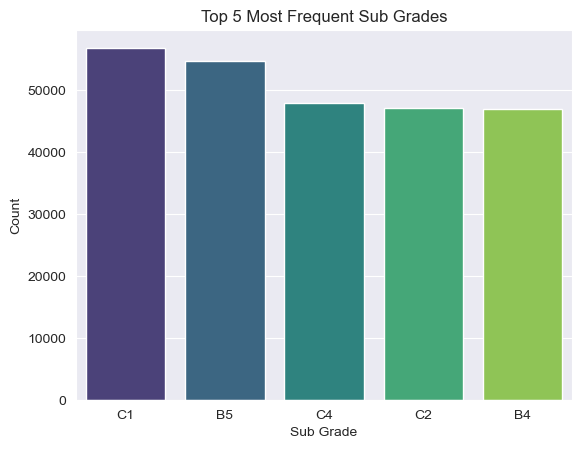

In [121]:
top_sub_grades_df = top_sub_grades.reset_index()
top_sub_grades_df.columns = ['sub_grade', 'count']

# Create a barplot
sns.barplot(data=top_sub_grades_df, x='sub_grade', y='count', palette='viridis')

# Add titles and labels
plt.title('Top 5 Most Frequent Sub Grades')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

In [122]:
emp_counts = df['emp_length'].value_counts().sort_values(ascending = False)
emp_counts

emp_length
10+ years    308307
2 years       69494
< 1 year      62724
3 years       60843
1 year        50585
5 years       46139
4 years       45573
6 years       32616
8 years       28707
9 years       28554
7 years       25796
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\819630543.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emp_counts_df, x='emp_length', y='count', palette='viridis')


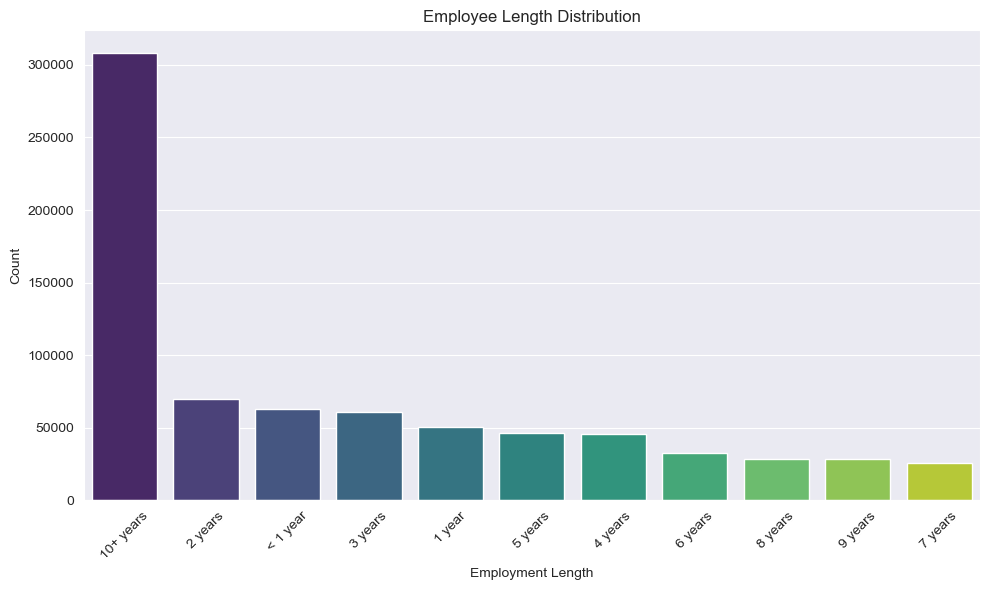

In [123]:
# Convert to DataFrame for plotting
emp_counts_df = emp_counts.reset_index()
emp_counts_df.columns = ['emp_length', 'count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=emp_counts_df, x='emp_length', y='count', palette='viridis')

plt.title('Employee Length Distribution')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [124]:
home_ownership_counts = df['home_ownership'].value_counts().sort_values(ascending = False)
home_ownership_counts

home_ownership
MORTGAGE    371579
RENT        297100
OWN          90151
ANY            504
NONE             4
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\448127204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_ownership_counts.index, y=home_ownership_counts.values, palette="viridis")


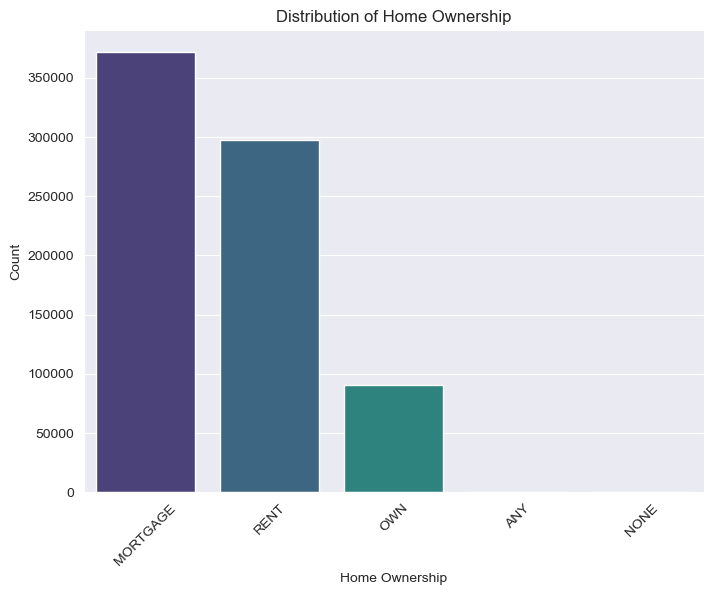

In [125]:
# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=home_ownership_counts.index, y=home_ownership_counts.values, palette="viridis")
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership')
plt.xticks(rotation=45)
plt.show()

In [126]:
top_income_counts = df['annual_inc'].value_counts().sort_values(ascending = False).head()
top_income_counts

annual_inc
60000.0    29132
50000.0    25094
65000.0    21744
70000.0    21073
80000.0    20371
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\1756221391.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_income_df, x='annual_inc', y='count', palette='viridis')


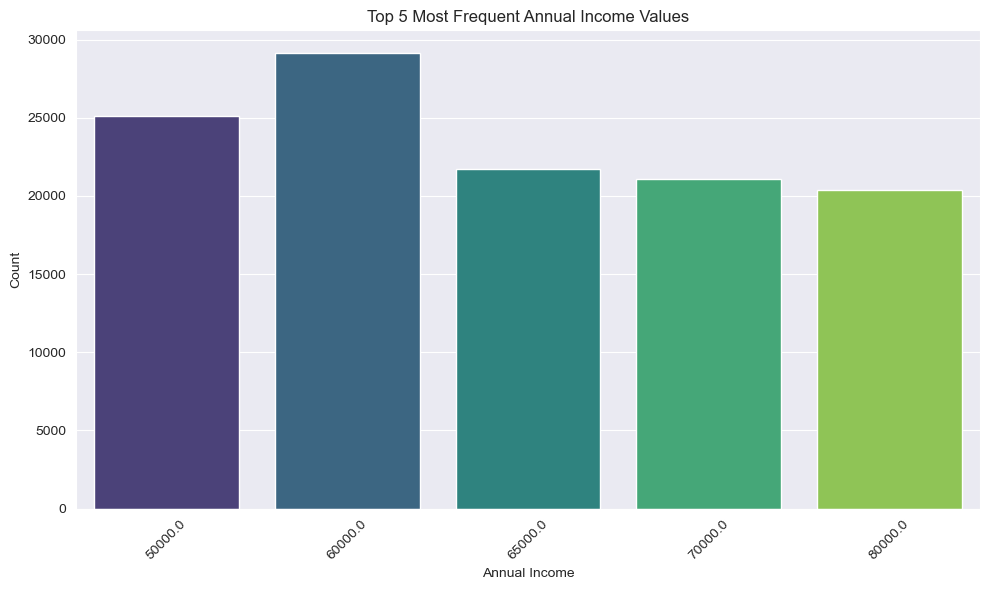

In [127]:
top_income_df = top_income_counts.reset_index()
top_income_df.columns = ['annual_inc', 'count']

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_income_df, x='annual_inc', y='count', palette='viridis')
plt.title('Top 5 Most Frequent Annual Income Values')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [128]:
category_counts = df['annual_inc_category'].value_counts().sort_values(ascending = False)
category_counts

annual_inc_category
Very Low (0-1L)        600071
Low (1L-3L)            153694
Lower-Mid (3L-5L)        4343
Mid (5L-10L)             1054
Upper-Mid (10L-20L)       108
High (20L-50L)             34
Very High (50L-89L)        26
Above 89L                   8
Name: count, dtype: int64

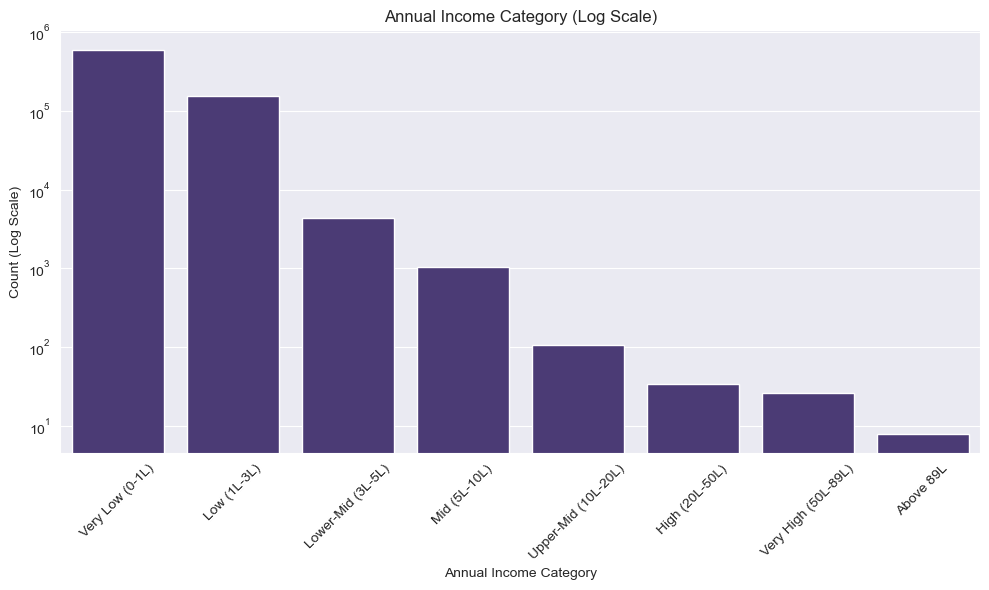

In [129]:
# Log scale bar plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='annual_inc_category', order=df['annual_inc_category'].value_counts().index)
plt.yscale('log')  # Set y-axis to log scale
plt.title('Annual Income Category (Log Scale)')
plt.xlabel('Annual Income Category')
plt.ylabel('Count (Log Scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [130]:
vs_counts = df['verification_status'].value_counts().sort_values(ascending = False)
vs_counts

verification_status
Source Verified    298669
Not Verified       249250
Verified           211419
Name: count, dtype: int64

In [131]:
# Pie chart
plt.pie(vc, labels=vc.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Verification Status Distribution')
plt.axis('equal')
plt.show()

NameError: name 'vc' is not defined

In [132]:
issue_d_counts = df['issue_d'].value_counts().sort_values(ascending = False).head()
issue_d_counts

issue_d
2016-03-01    61992
2017-08-01    43573
2017-09-01    39713
2016-02-01    39529
2017-07-01    39415
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\2688302667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=issue_d_counts.values, y=issue_d_counts.index, palette="magma")


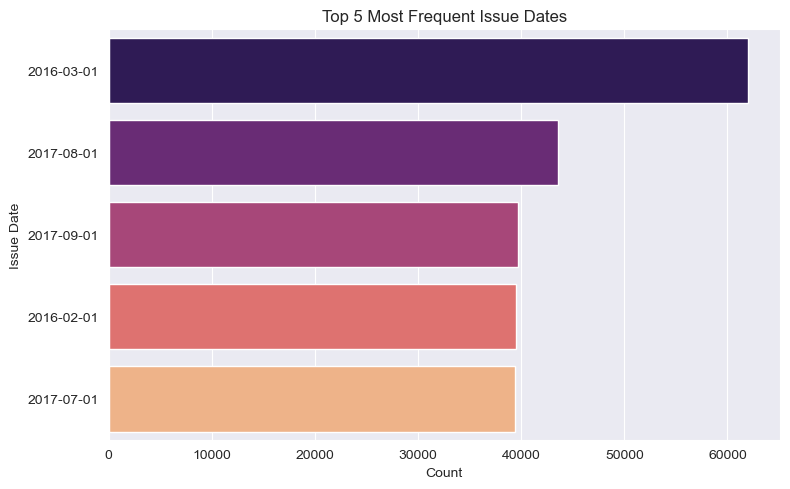

In [133]:
plt.figure(figsize=(8, 5))
sns.barplot(x=issue_d_counts.values, y=issue_d_counts.index, palette="magma")
plt.title("Top 5 Most Frequent Issue Dates")
plt.xlabel("Count")
plt.ylabel("Issue Date")
plt.tight_layout()
plt.show()

In [134]:
loan_s_counts = df['loan_status'].value_counts().sort_values(ascending = False)
loan_s_counts

loan_status
Current               565523
Fully Paid            130718
Charged Off            37197
Late (31-120 days)     15354
In Grace Period         6634
Late (16-30 days)       3876
Default                   36
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\3417612020.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_status', order=loan_s_counts.index, palette='magma')


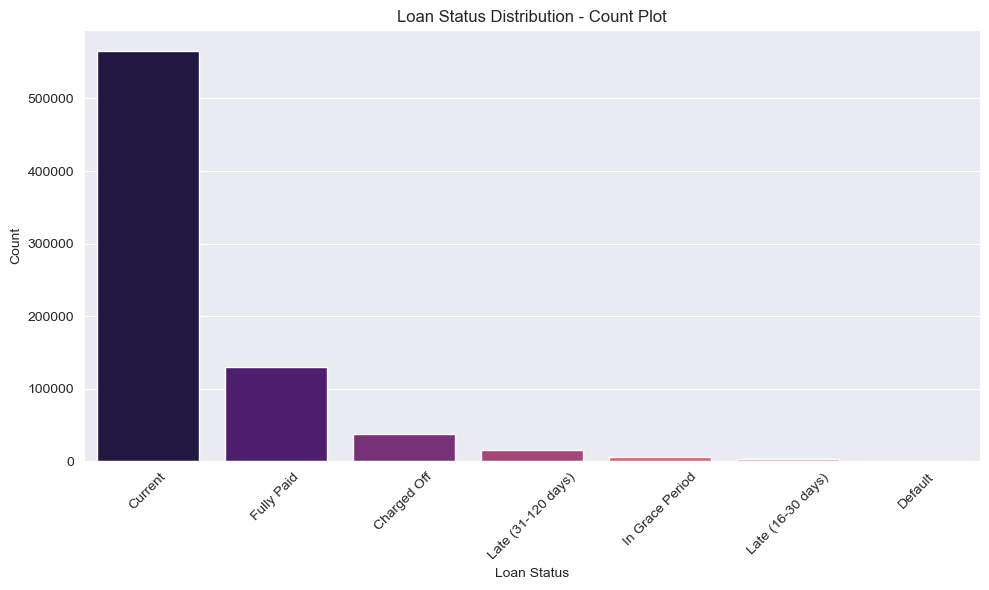

In [135]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_status', order=loan_s_counts.index, palette='magma')
plt.title('Loan Status Distribution - Count Plot')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [136]:
purpose_counts = df['purpose'].value_counts().sort_values(ascending = False)
purpose_counts

purpose
debt_consolidation    431530
credit_card           157768
home_improvement       57197
other                  50680
major_purchase         18319
medical                10360
car                     8777
small_business          8235
vacation                6416
moving                  5973
house                   3561
renewable_energy         519
wedding                    3
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\10232547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts.values, y=purpose_counts.index, palette='viridis')


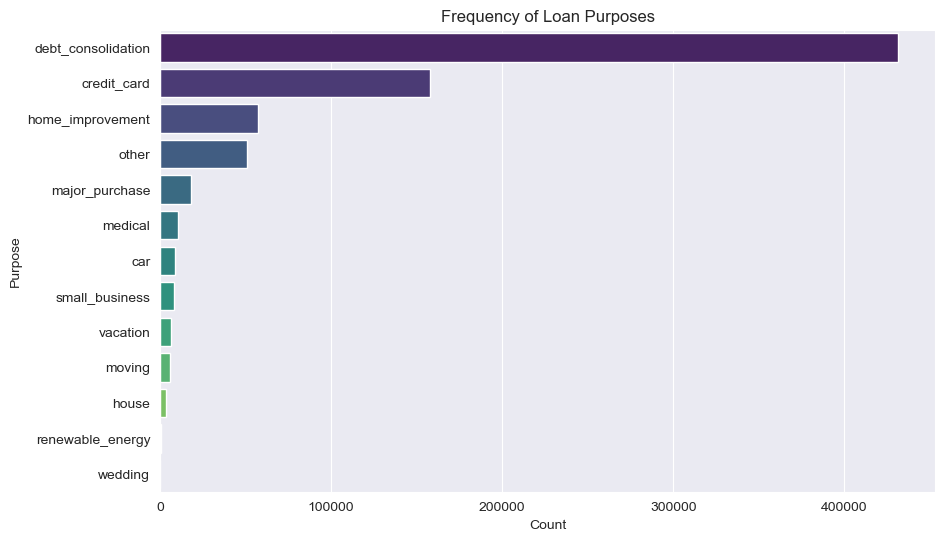

In [137]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=purpose_counts.values, y=purpose_counts.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Frequency of Loan Purposes')
plt.show()

In [138]:
top_states = df['addr_state'].value_counts().sort_values(ascending = False).head(10)
top_states

addr_state
CA    101377
TX     64425
NY     62974
FL     54773
IL     31063
NJ     27830
OH     25782
PA     25639
GA     24828
NC     21231
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\352642134.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")


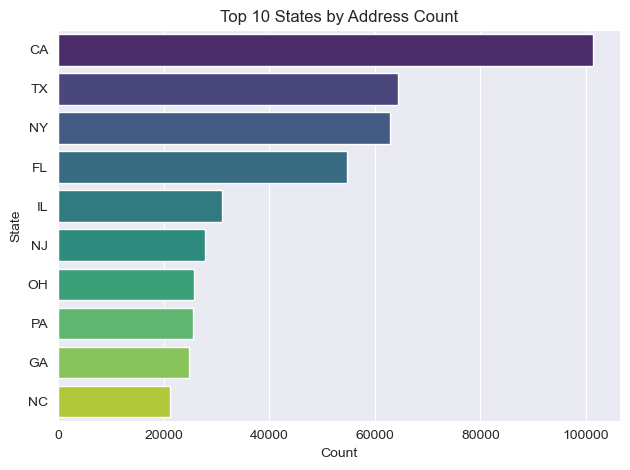

In [139]:
sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("State")
plt.title("Top 10 States by Address Count")
plt.tight_layout()
plt.show()

In [140]:
top_dti = df['dti'].value_counts().sort_values(ascending = False).head()
top_dti

dti
18.18    684
16.80    527
18.00    523
14.40    512
19.20    511
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\3568633924.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_dti.index.astype(str), x=top_dti.values, palette="crest")


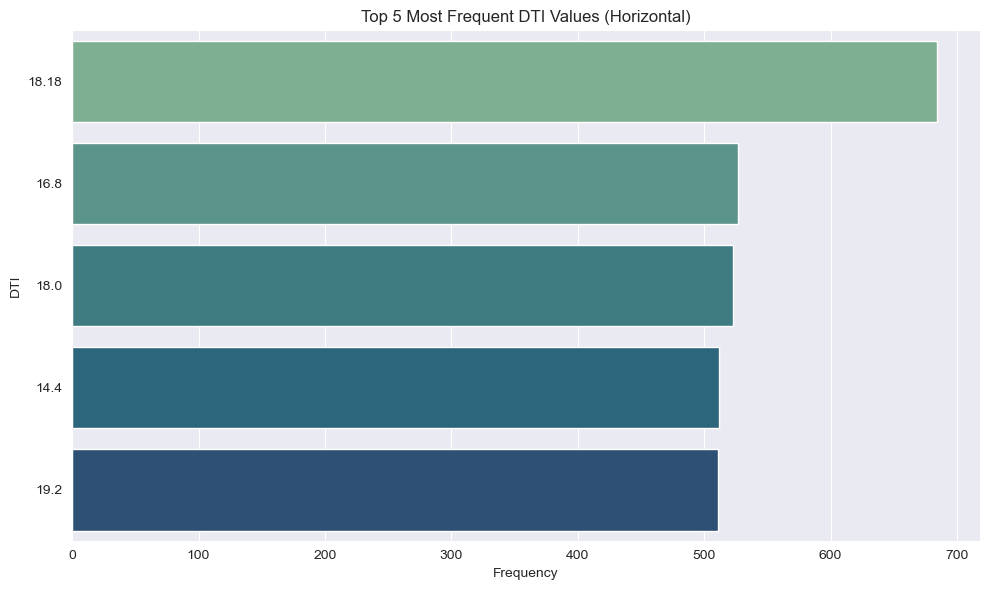

In [141]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_dti.index.astype(str), x=top_dti.values, palette="crest")
plt.xlabel("Frequency")
plt.ylabel("DTI")
plt.title("Top 5 Most Frequent DTI Values (Horizontal)")
plt.tight_layout()
plt.show()

In [142]:
df['dti_category'].value_counts().sort_values(ascending = False)

dti_category
Moderate (10–20)     310077
High (20–30)         239593
Low (5–10)            93271
Very High (30–50)     78589
Very Low (0–5)        34373
Risky (>50)            3433
Unknown                   2
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\3856508945.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='dti_category', order=df['dti_category'].value_counts().index, palette='magma')


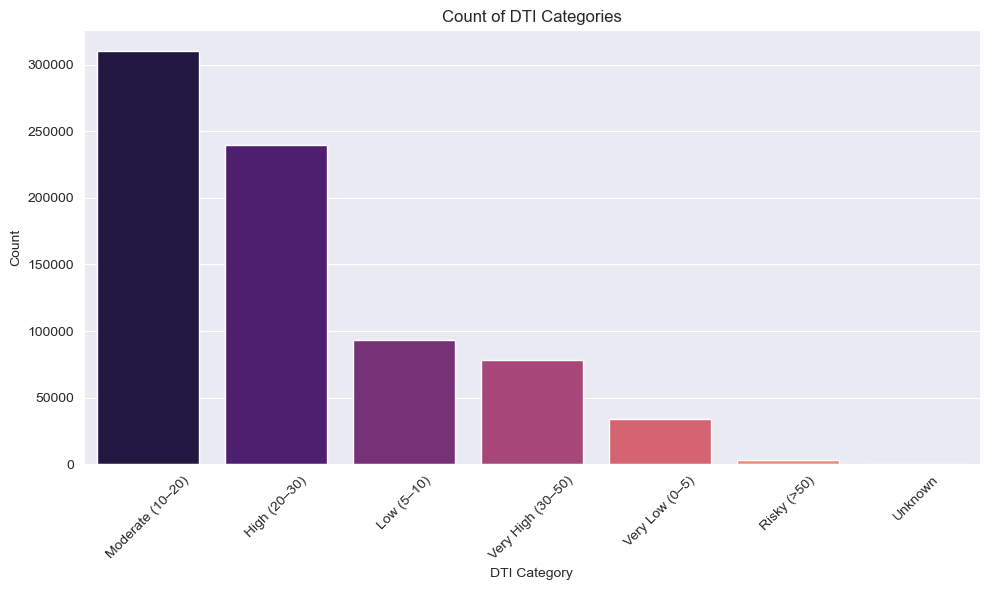

In [143]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='dti_category', order=df['dti_category'].value_counts().index, palette='magma')
plt.title('Count of DTI Categories')
plt.xlabel('DTI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [144]:
df['delinq_2yrs'].value_counts().sort_values(ascending = False).head()

delinq_2yrs
0    599255
1    104253
2     31562
3     11963
4      5378
Name: count, dtype: int64

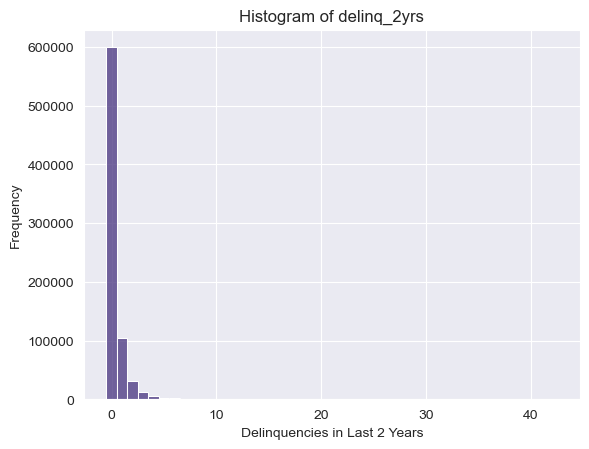

In [145]:
sns.histplot(df['delinq_2yrs'], bins=5, discrete=True)
plt.xlabel('Delinquencies in Last 2 Years')
plt.ylabel('Frequency')
plt.title('Histogram of delinq_2yrs')
plt.show()

In [146]:
delinq_counts = df['delinq_2yrs_category'].value_counts().sort_values(ascending = False)
delinq_counts

delinq_2yrs_category
No Delinquencies (0)             599255
One Delinquency (1)              104253
Few Delinquencies (2–3)           43525
Several Delinquencies (4–6)        9687
Many Delinquencies (7–10)          2072
High Delinquencies (11–20)          533
Very High Delinquencies (21+)        13
Name: count, dtype: int64

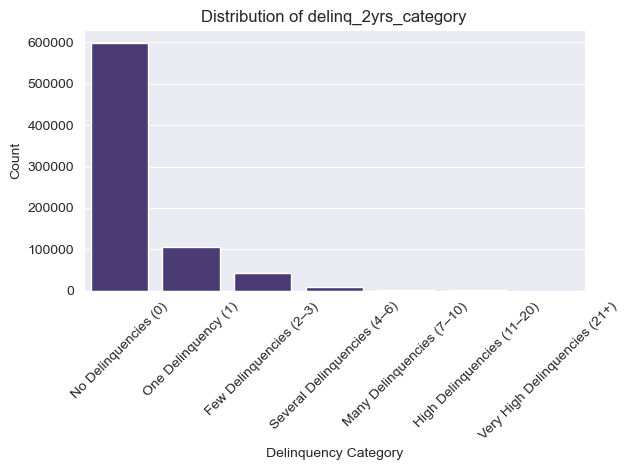

In [147]:
# Bar plot
sns.barplot(x=delinq_counts.index, y=delinq_counts.values)
plt.xlabel('Delinquency Category')
plt.ylabel('Count')
plt.title('Distribution of delinq_2yrs_category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [148]:
cr_line = df['earliest_cr_line'].value_counts().sort_values(ascending = False).head()
cr_line

earliest_cr_line
2004-09-01    5826
2005-09-01    5672
2003-09-01    5615
2004-08-01    5594
2003-08-01    5531
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\237703678.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='earliest_cr_line', x='count', data=cr_line_df, palette='Greens_d')


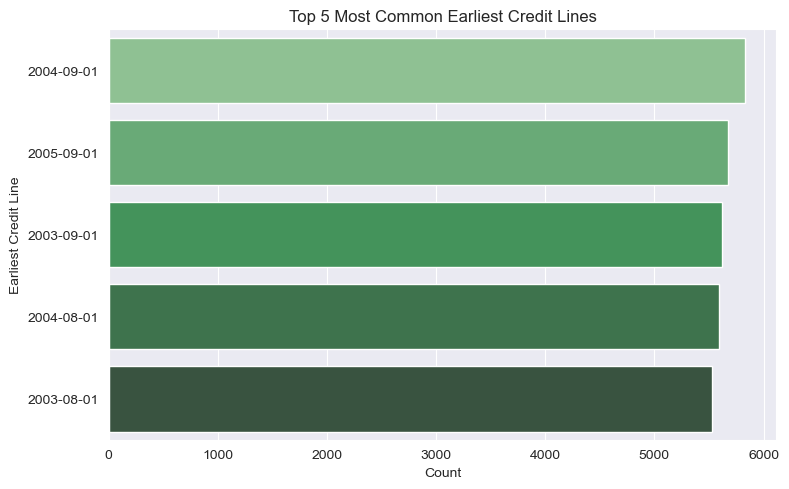

In [149]:
cr_line_df = cr_line.reset_index()
cr_line_df.columns = ['earliest_cr_line', 'count']

plt.figure(figsize=(8, 5))
sns.barplot(y='earliest_cr_line', x='count', data=cr_line_df, palette='Greens_d')
plt.title('Top 5 Most Common Earliest Credit Lines')
plt.xlabel('Count')
plt.ylabel('Earliest Credit Line')
plt.tight_layout()
plt.show()

In [150]:
top_open_acc = df['open_acc'].value_counts().sort_values(ascending = False).head()
top_open_acc

open_acc
9     64816
10    63095
8     62275
11    58696
7     57336
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\1298154991.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['open_acc'].isin(top_open_acc.index)], x='open_acc', palette='coolwarm')


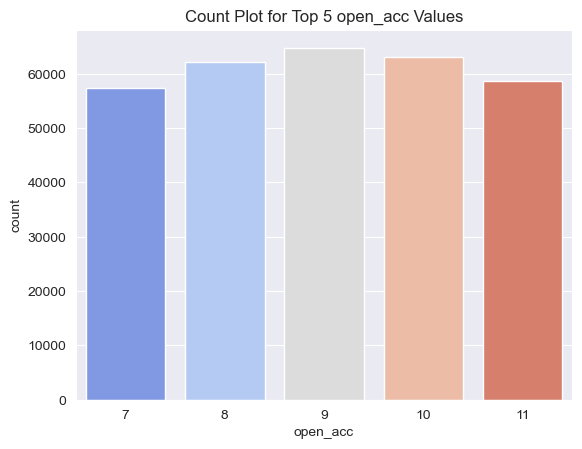

In [151]:
sns.countplot(data=df[df['open_acc'].isin(top_open_acc.index)], x='open_acc', palette='coolwarm')
plt.title('Count Plot for Top 5 open_acc Values')
plt.show()

In [152]:
counts = df['open_acc_category'].value_counts().sort_values(ascending = False)
counts

open_acc_category
Many (11–20)            335000
Moderate (7–10)         247522
Few (4–6)               104485
Very Many (21–40)        58398
Very Few (1–3)           12884
Extremely Many (41+)      1045
No Accounts                  4
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\2226295349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=counts.index, x=counts.values, palette="coolwarm")


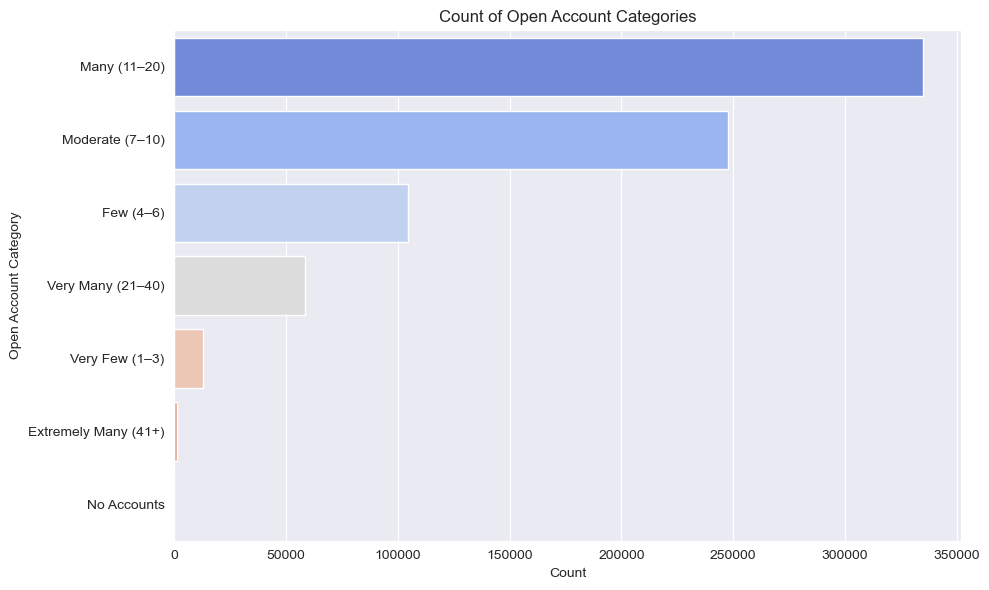

In [153]:
plt.figure(figsize=(10, 6))
sns.barplot(y=counts.index, x=counts.values, palette="coolwarm")
plt.title('Count of Open Account Categories')
plt.ylabel('Open Account Category')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

In [154]:
pub_counts = df['pub_rec'].value_counts().sort_values(ascending = False).head()
pub_counts

pub_rec
0    618159
1    115023
2     16729
3      5364
4      2040
Name: count, dtype: int64

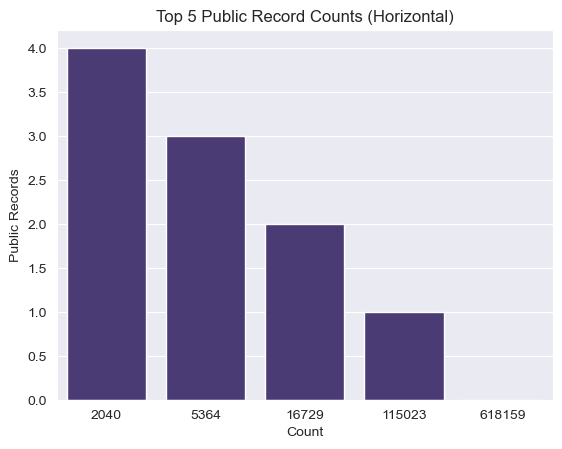

In [155]:
sns.barplot(x=pub_counts.values, y=pub_counts.index)
plt.xlabel('Count')
plt.ylabel('Public Records')
plt.title('Top 5 Public Record Counts (Horizontal)')
plt.show()

In [156]:
top_revol_util = df['revol_util'].value_counts().sort_values(ascending = False).head()
top_revol_util

revol_util
0.0     3380
57.0    1601
48.0    1558
49.6    1549
59.0    1547
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\1957182470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['revol_util'].isin(top_revol_util.index)], x='revol_util', order=top_revol_util.index, palette='Set2')


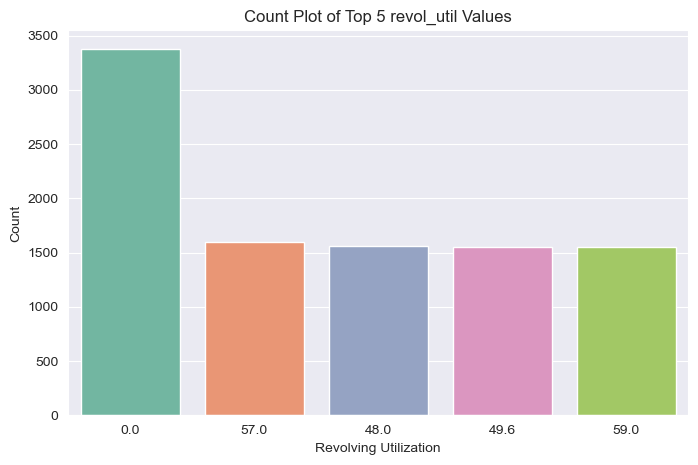

In [157]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df[df['revol_util'].isin(top_revol_util.index)], x='revol_util', order=top_revol_util.index, palette='Set2')
plt.title('Count Plot of Top 5 revol_util Values')
plt.xlabel('Revolving Utilization')
plt.ylabel('Count')
plt.show()

In [158]:
top_revol_util_counts = df['revol_util_category'].value_counts().sort_values(ascending = False)
top_revol_util_counts

revol_util_category
Low (26–50)         252450
Moderate (51–75)    240052
High (76–100)       131309
Very Low (0–25)     128986
No Usage (0)          3897
Very High (>100)      2644
Name: count, dtype: int64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\3996937351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_revol_util_counts.index, x=top_revol_util_counts.values, palette='magma')


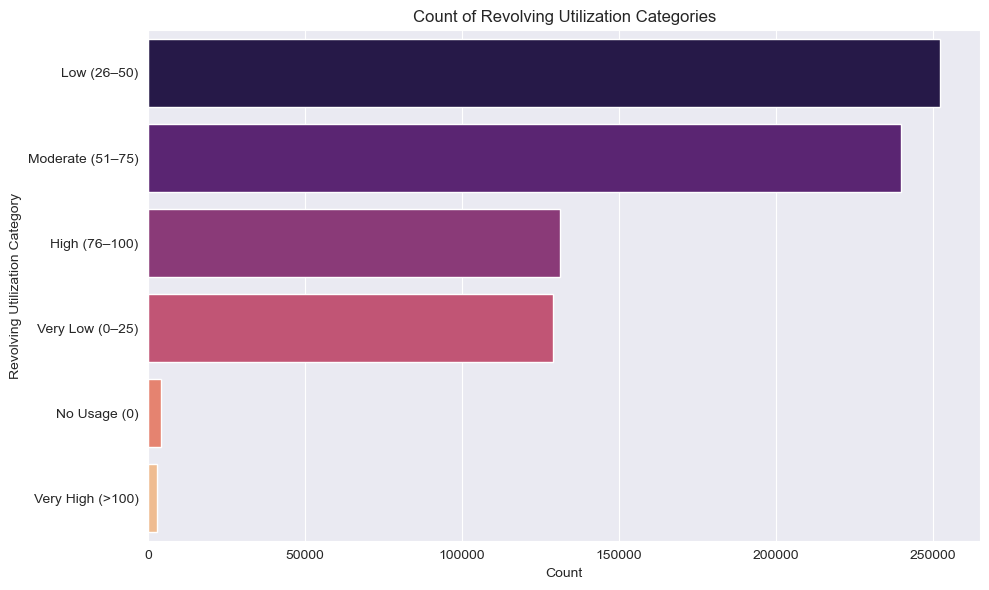

In [159]:
plt.figure(figsize=(10,6))
sns.barplot(y=top_revol_util_counts.index, x=top_revol_util_counts.values, palette='magma')
plt.title('Count of Revolving Utilization Categories')
plt.xlabel('Count')
plt.ylabel('Revolving Utilization Category')
plt.tight_layout()
plt.show()

In [160]:
total_acc_counts = df['total_acc'].value_counts().sort_values(ascending = False).head()
total_acc_counts

total_acc
20    28201
19    28103
18    27948
21    27851
17    27568
Name: count, dtype: int64

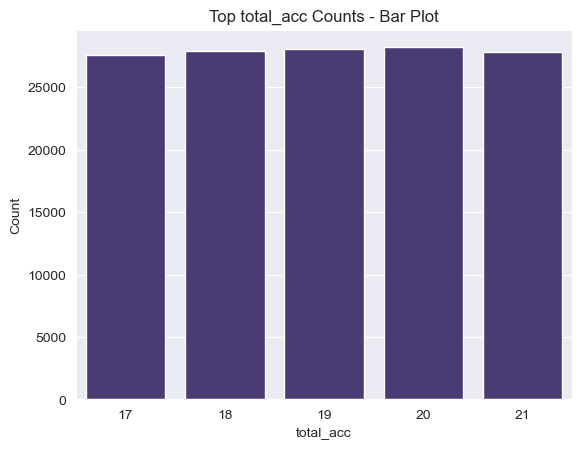

In [161]:
sns.barplot(x=total_acc_counts.index, y=total_acc_counts.values)
plt.xlabel('total_acc')
plt.ylabel('Count')
plt.title('Top total_acc Counts - Bar Plot')
plt.show()

# BI VARIATE ANALYSIS

In [162]:
df.groupby('loan_amt_category')['dti'].mean()

loan_amt_category
High (20001–30000)         19.740526
Low (5001–10000)           18.393187
Moderate (10001–20000)     19.371919
Very High (30001–40000)    19.582936
Very Low (1000–5000)       18.003113
Name: dti, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\2314379354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_amt_category', y='dti', data=df, palette='Set2')


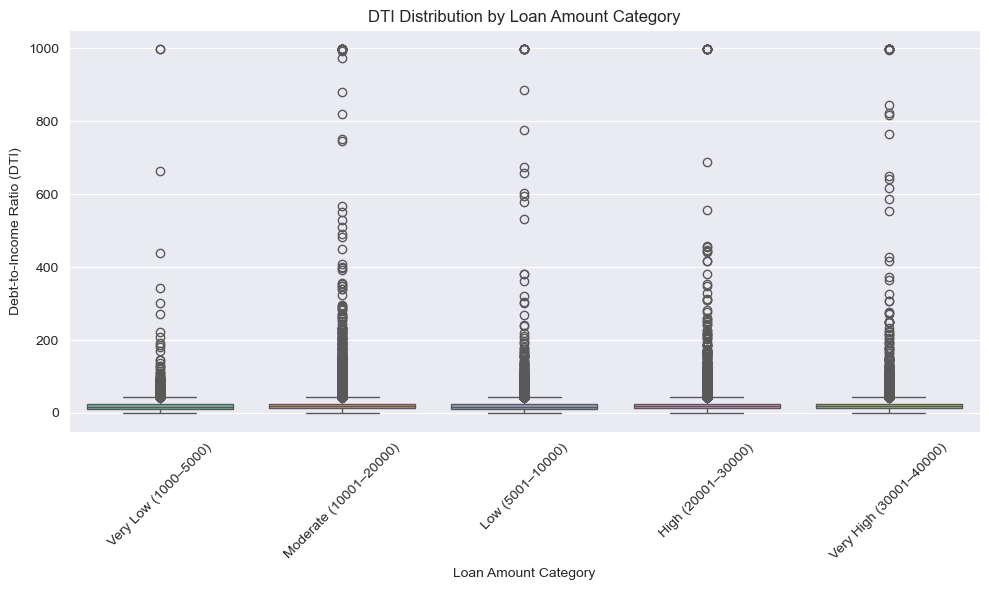

In [163]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_amt_category', y='dti', data=df, palette='Set2')
plt.title('DTI Distribution by Loan Amount Category')
plt.xlabel('Loan Amount Category')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [164]:
df.groupby('term')['dti'].mean()

term
36 months    18.570257
60 months    20.142483
Name: dti, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\2697129212.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='term', y='dti', data=df, estimator='mean', ci=None, color='blue')


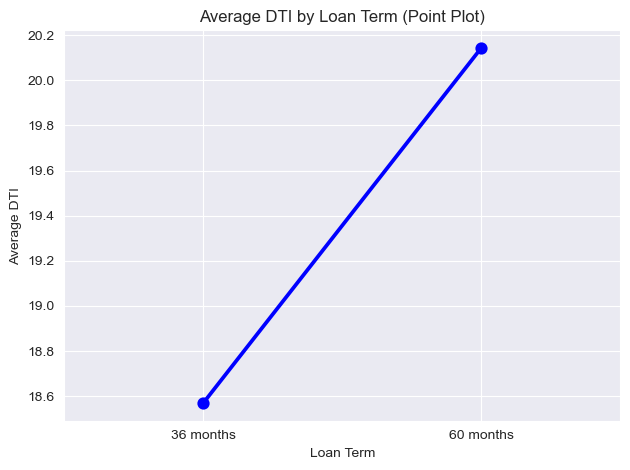

In [165]:
sns.pointplot(x='term', y='dti', data=df, estimator='mean', ci=None, color='blue')
plt.title('Average DTI by Loan Term (Point Plot)')
plt.xlabel('Loan Term')
plt.ylabel('Average DTI')
plt.grid(True)
plt.tight_layout()
plt.show()

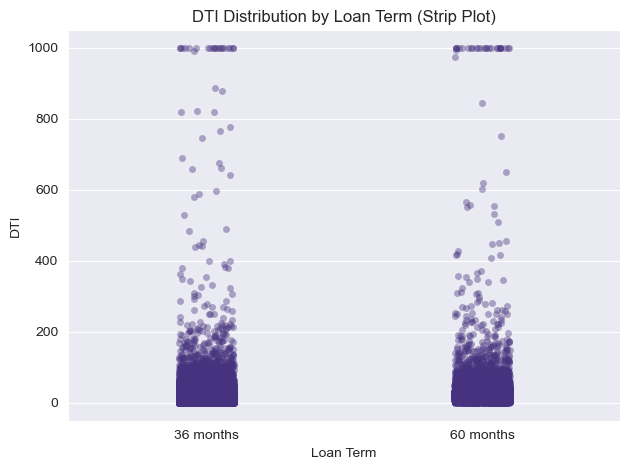

In [166]:
sns.stripplot(x='term', y='dti', data=df, jitter=True, alpha=0.4)
plt.title('DTI Distribution by Loan Term (Strip Plot)')
plt.xlabel('Loan Term')
plt.ylabel('DTI')
plt.tight_layout()
plt.show()

In [167]:
df.groupby('int_rate')['dti'].mean()

int_rate
5.32     14.593889
6.00     20.934971
6.24     13.260000
6.49     15.934331
6.89     12.714286
           ...    
30.79    22.455545
30.84    24.361783
30.89    24.368878
30.94    23.356400
30.99    26.510749
Name: dti, Length: 168, dtype: float64

In [168]:
df.groupby('int_rate_category')['dti'].mean()

int_rate_category
High (20.01–25)        22.135600
Low (10.01–15)         18.815161
Moderate (15.01–20)    20.943562
Very High (>25)        23.004617
Very Low (5.32–10)     16.768096
Name: dti, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\2281080593.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_dti, x='int_rate_category', y='dti', palette='viridis')


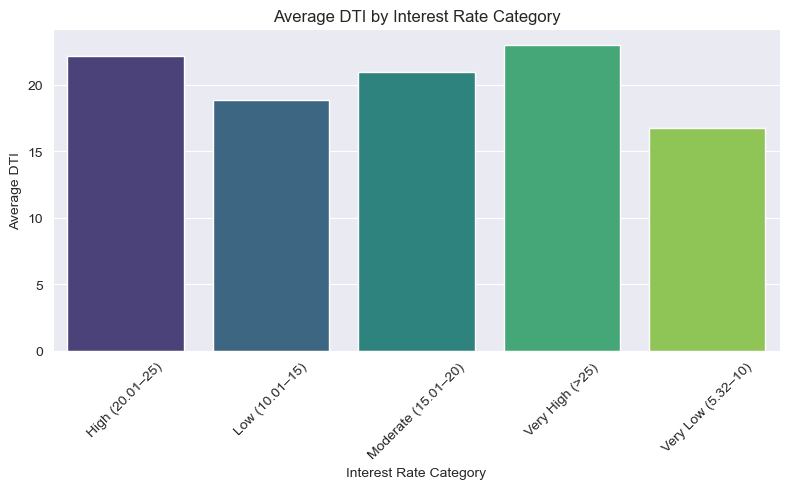

In [189]:
mean_dti = df.groupby('int_rate_category')['dti'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=mean_dti, x='int_rate_category', y='dti', palette='viridis')

plt.title('Average DTI by Interest Rate Category')
plt.xlabel('Interest Rate Category')
plt.ylabel('Average DTI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [169]:
df.groupby('grade')['dti'].mean()

grade
A    16.192817
B    17.919576
C    19.590538
D    21.176624
E    22.261533
F    23.303261
G    24.391633
Name: dti, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\450498144.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grade_dti_mean, x='grade', y='dti', palette='viridis')


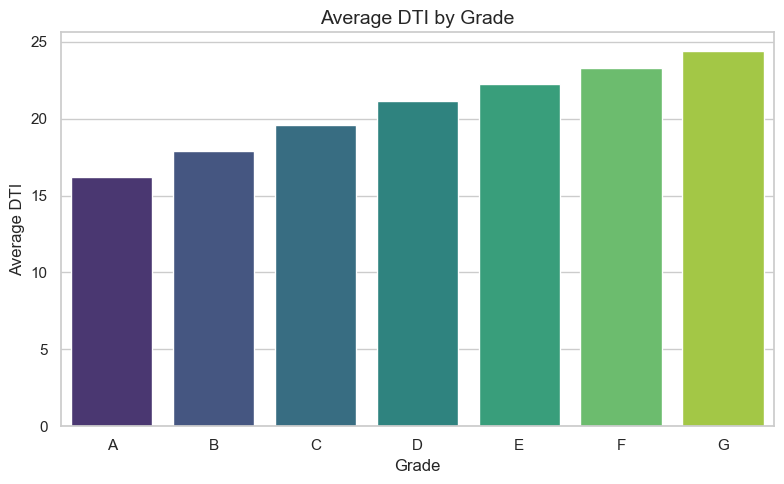

In [190]:
# Grouping and calculating mean
grade_dti_mean = df.groupby('grade')['dti'].mean().reset_index()

# Set style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=grade_dti_mean, x='grade', y='dti', palette='viridis')

# Add labels and title
plt.title('Average DTI by Grade', fontsize=14)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Average DTI', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [170]:
df.groupby('sub_grade')['dti'].mean().head()

sub_grade
A1    14.593889
A2    16.012374
A3    16.772717
A4    16.869645
A5    17.063948
Name: dti, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\3069065824.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dti_by_subgrade.index, y=dti_by_subgrade.values, palette='viridis')


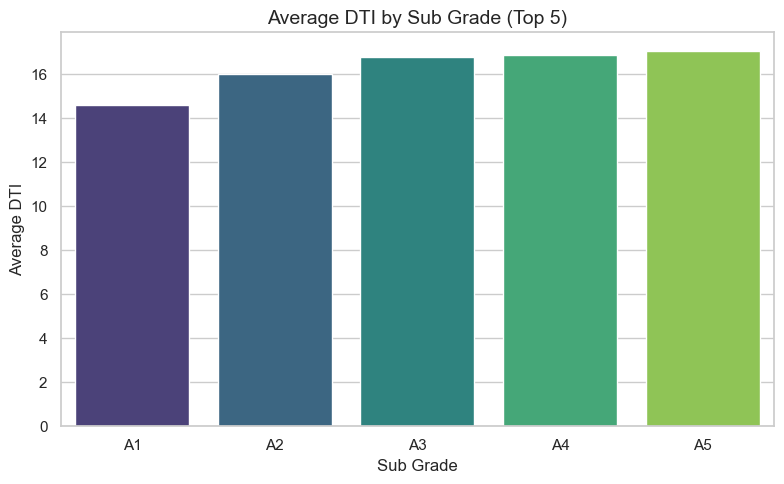

In [191]:
dti_by_subgrade = df.groupby('sub_grade')['dti'].mean().head()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=dti_by_subgrade.index, y=dti_by_subgrade.values, palette='viridis')

plt.title('Average DTI by Sub Grade (Top 5)', fontsize=14)
plt.xlabel('Sub Grade', fontsize=12)
plt.ylabel('Average DTI', fontsize=12)
plt.tight_layout()
plt.show()

In [171]:
df.groupby('emp_length')['dti'].mean()

emp_length
1 year       18.188940
10+ years    19.458754
2 years      18.237187
3 years      18.359099
4 years      18.510654
5 years      18.488141
6 years      18.607173
7 years      18.693369
8 years      18.764825
9 years      18.949362
< 1 year     19.822203
Name: dti, dtype: float64

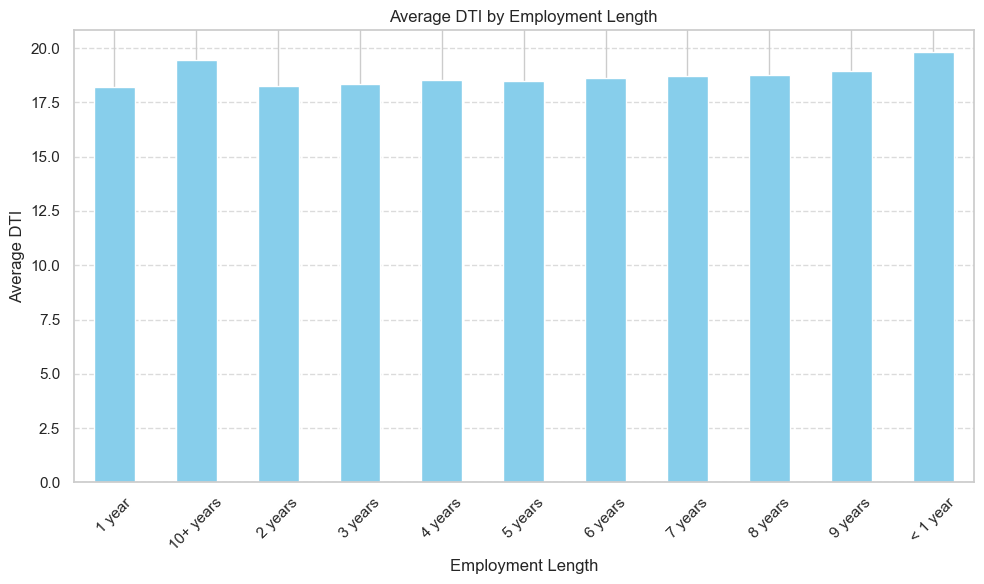

In [192]:
avg_dti = df.groupby('emp_length')['dti'].mean().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
avg_dti.plot(kind='bar', color='skyblue')
plt.title('Average DTI by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Average DTI')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [172]:
df.groupby('home_ownership')['dti'].mean()

home_ownership
ANY         18.212738
MORTGAGE    19.282409
NONE        57.000000
OWN         19.007945
RENT        18.595187
Name: dti, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\2721876577.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_dti_df, x='emp_length', y='dti', palette='Blues_d')


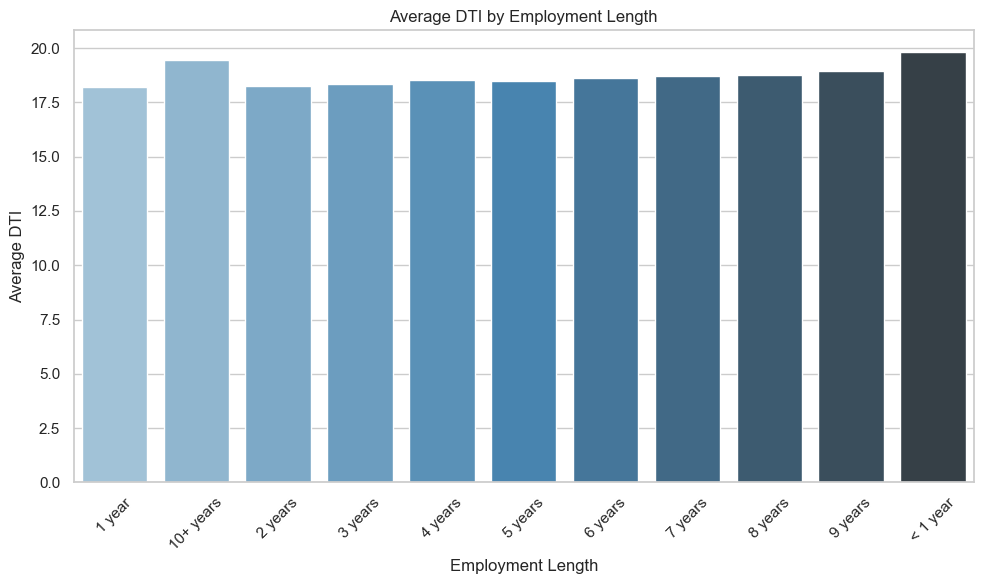

In [193]:
avg_dti_df = df.groupby('emp_length', as_index=False)['dti'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_dti_df, x='emp_length', y='dti', palette='Blues_d')
plt.title('Average DTI by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Average DTI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [173]:
df.groupby('annual_inc_category')['dti'].mean()

annual_inc_category
Above 89L               0.135000
High (20L-50L)          1.099706
Low (1L-3L)            16.016911
Lower-Mid (3L-5L)      11.161451
Mid (5L-10L)            8.075787
Upper-Mid (10L-20L)     4.355185
Very High (50L-89L)     0.235385
Very Low (0-1L)        19.819916
Name: dti, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\3238165573.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='annual_inc_category', y='dti', data=dti_by_income, palette='viridis')


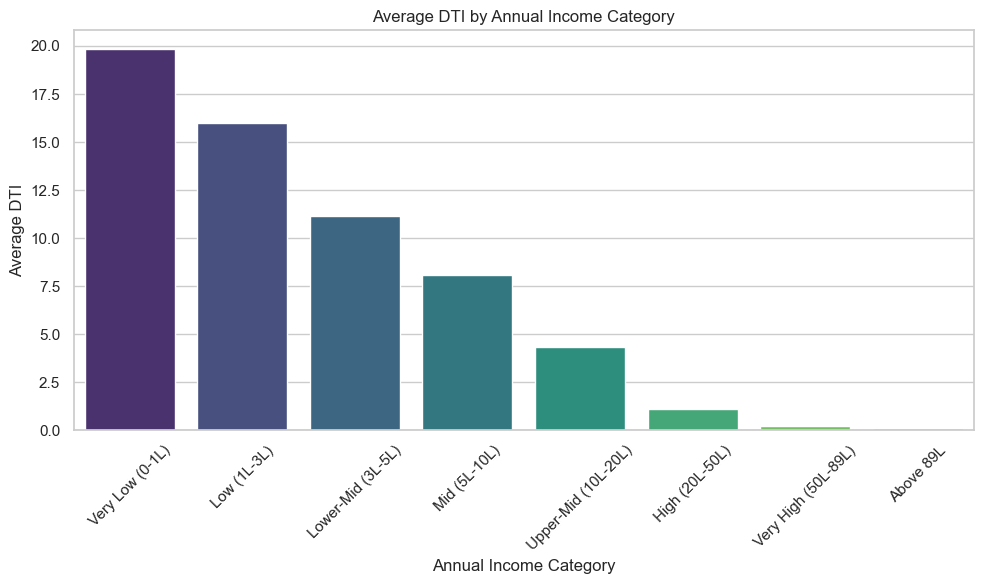

In [194]:
dti_by_income = df.groupby('annual_inc_category')['dti'].mean().reset_index()

dti_by_income = dti_by_income.sort_values(by='dti', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='annual_inc_category', y='dti', data=dti_by_income, palette='viridis')

plt.title('Average DTI by Annual Income Category')
plt.xlabel('Annual Income Category')
plt.ylabel('Average DTI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [174]:
df.groupby('verification_status')['dti'].mean()

verification_status
Not Verified       18.776632
Source Verified    17.477395
Verified           21.344010
Name: dti, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\1643316900.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dti_means, x='verification_status', y='dti', palette='viridis')


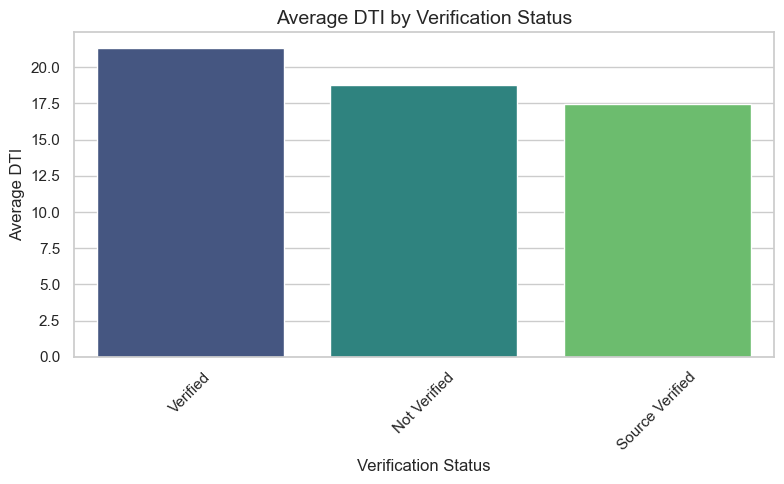

In [195]:
dti_means = df.groupby('verification_status')['dti'].mean().reset_index()

# Sort by DTI (optional for better visual)
dti_means = dti_means.sort_values(by='dti', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=dti_means, x='verification_status', y='dti', palette='viridis')

# Titles and labels
plt.title('Average DTI by Verification Status', fontsize=14)
plt.xlabel('Verification Status')
plt.ylabel('Average DTI')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [175]:
df.groupby('issue_d')['dti'].mean()

issue_d
2016-01-01    19.245148
2016-02-01    19.687326
2016-03-01    19.614815
2016-04-01    19.176112
2016-05-01    19.504403
2016-06-01    18.267984
2016-07-01    17.957760
2016-08-01    17.939323
2016-09-01    17.930961
2016-10-01    18.647758
2016-11-01    18.724161
2016-12-01    18.925700
2017-01-01    18.711388
2017-02-01    18.615825
2017-03-01    18.622093
2017-04-01    19.068948
2017-05-01    19.028049
2017-06-01    18.881698
2017-07-01    19.246306
2017-08-01    19.308223
2017-09-01    20.410662
Name: dti, dtype: float64

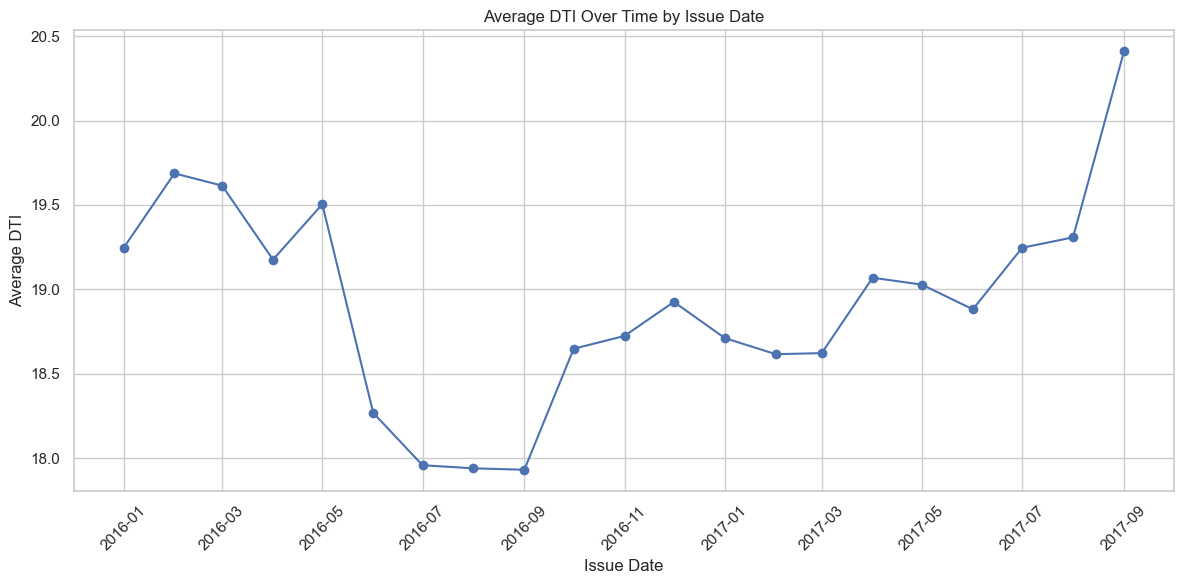

In [196]:
dti_by_issue = df.groupby('issue_d')['dti'].mean()

# Sort index if 'issue_d' is datetime or string formatted date
dti_by_issue = dti_by_issue.sort_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dti_by_issue.index, dti_by_issue.values, marker='o', linestyle='-')
plt.xlabel('Issue Date')
plt.ylabel('Average DTI')
plt.title('Average DTI Over Time by Issue Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [176]:
df.groupby('loan_status')['dti'].mean()

loan_status
Charged Off           20.949160
Current               19.034112
Default               19.845833
Fully Paid            17.936043
In Grace Period       20.011057
Late (16-30 days)     19.741419
Late (31-120 days)    20.485740
Name: dti, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\1143071451.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dti', y='loan_status', data=mean_dti, palette='Blues_d')


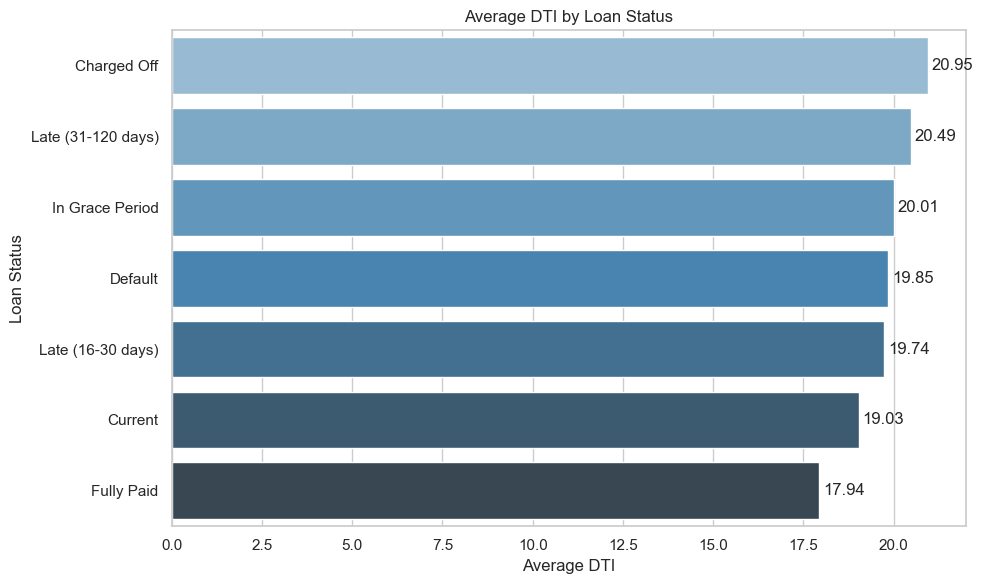

In [197]:
mean_dti = df.groupby('loan_status')['dti'].mean().reset_index()

# Sort by DTI if you want a more readable plot
mean_dti = mean_dti.sort_values(by='dti', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='dti', y='loan_status', data=mean_dti, palette='Blues_d')

# Titles and labels
plt.title('Average DTI by Loan Status')
plt.xlabel('Average DTI')
plt.ylabel('Loan Status')

# Show values on bars
for index, value in enumerate(mean_dti['dti']):
    plt.text(value + 0.1, index, f"{value:.2f}", va='center')

plt.tight_layout()
plt.show()

In [177]:
df.groupby('purpose')['dti'].mean()

purpose
car                   16.167749
credit_card           19.328016
debt_consolidation    19.596747
home_improvement      16.923191
house                 16.589871
major_purchase        15.853288
medical               18.624991
moving                17.471195
other                 17.608483
renewable_energy      17.026320
small_business        15.731673
vacation              18.570860
wedding               11.833333
Name: dti, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\1380774553.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_dti_by_purpose.index, y=avg_dti_by_purpose.values, palette="viridis")


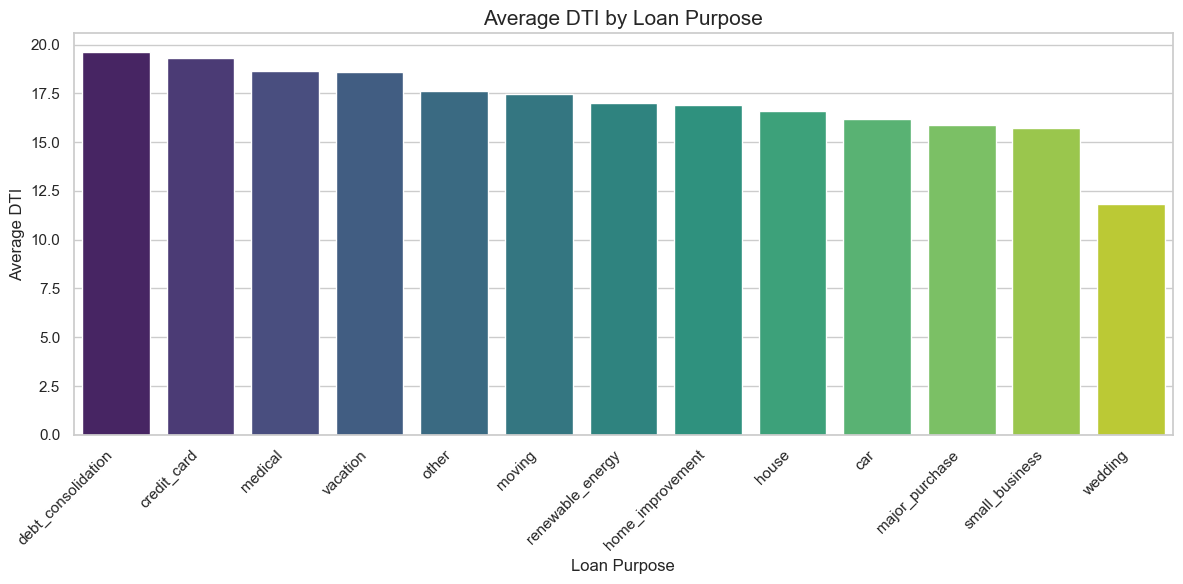

In [198]:
avg_dti_by_purpose = df.groupby('purpose')['dti'].mean().sort_values(ascending=False)

# Set the style
sns.set(style="whitegrid")

# Create the barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_dti_by_purpose.index, y=avg_dti_by_purpose.values, palette="viridis")

# Add labels and title
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Average DTI', fontsize=12)
plt.title('Average DTI by Loan Purpose', fontsize=15)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

# Show plot
plt.tight_layout()
plt.show()

In [178]:
df.groupby('addr_state')['dti'].mean().head()

addr_state
AK    19.495622
AL    20.682585
AR    21.055218
AZ    19.152741
CA    17.493885
Name: dti, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\3371754449.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_dti_by_state.index, y=avg_dti_by_state.values, palette='viridis')


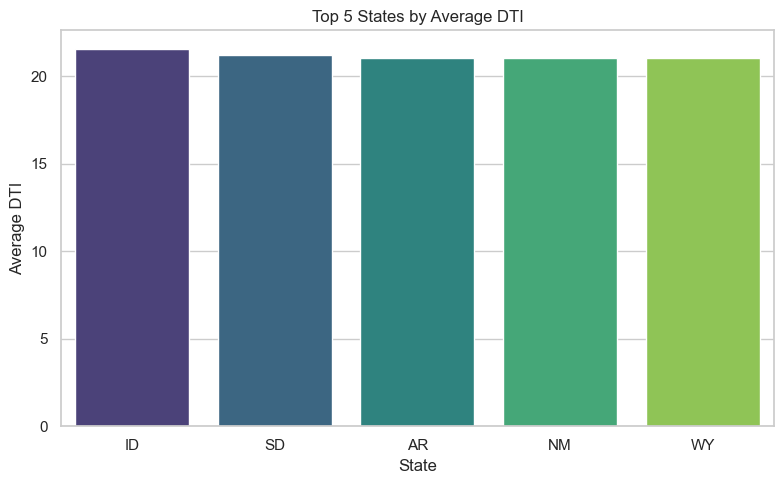

In [199]:
avg_dti_by_state = df.groupby('addr_state')['dti'].mean().sort_values(ascending=False).head()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_dti_by_state.index, y=avg_dti_by_state.values, palette='viridis')

plt.title('Top 5 States by Average DTI')
plt.xlabel('State')
plt.ylabel('Average DTI')
plt.tight_layout()
plt.show()

In [179]:
df.groupby('delinq_2yrs_category')['dti'].mean()

delinq_2yrs_category
Few Delinquencies (2–3)          18.541622
High Delinquencies (11–20)       18.655328
Many Delinquencies (7–10)        18.481718
No Delinquencies (0)             19.056779
One Delinquency (1)              18.809052
Several Delinquencies (4–6)      18.197521
Very High Delinquencies (21+)    19.218462
Name: dti, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\2768365497.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_df, x='delinq_2yrs_category', y='dti', palette='viridis')


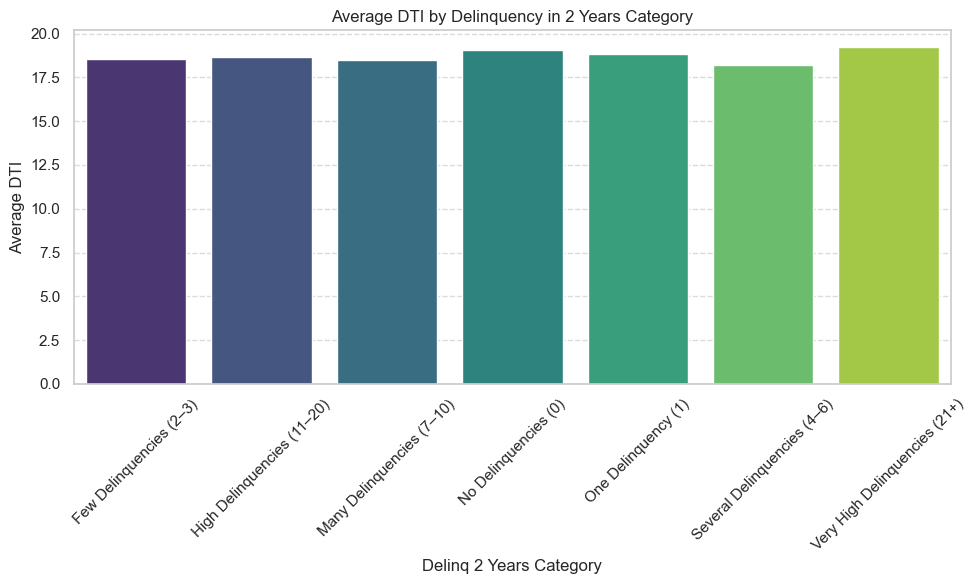

In [201]:
grouped_df = df.groupby('delinq_2yrs_category')['dti'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='delinq_2yrs_category', y='dti', palette='viridis')
plt.title('Average DTI by Delinquency in 2 Years Category')
plt.xlabel('Delinq 2 Years Category')
plt.ylabel('Average DTI')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [180]:
df.groupby('open_acc_category')['dti'].mean()

open_acc_category
Extremely Many (41+)    23.791053
Few (4–6)               14.503153
Many (11–20)            20.814563
Moderate (7–10)         17.901061
No Accounts              5.145000
Very Few (1–3)           9.964888
Very Many (21–40)       22.948462
Name: dti, dtype: float64

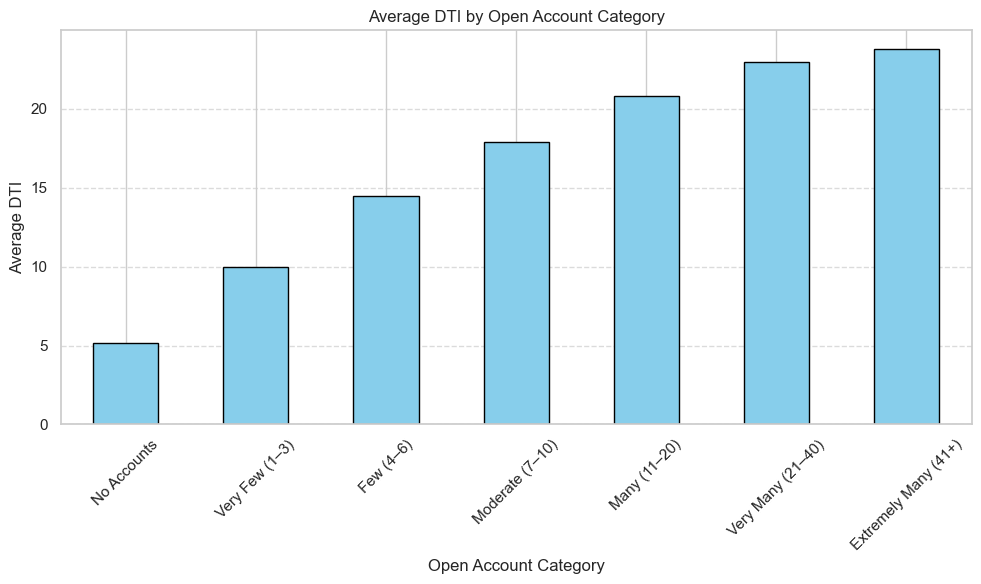

In [202]:
grouped_data = df.groupby('open_acc_category')['dti'].mean().sort_values()

# Plotting
plt.figure(figsize=(10,6))
grouped_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average DTI by Open Account Category')
plt.xlabel('Open Account Category')
plt.ylabel('Average DTI')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [181]:
df.groupby('pub_rec')['dti'].mean()

pub_rec
0     19.144978
1     18.561298
2     17.217818
3     16.685695
4     16.532358
5     15.781450
6     15.539261
7     15.854667
8     14.938621
9     17.843457
10    15.866136
11    14.790000
12    15.111579
13    13.840000
14    13.808889
15    10.095000
16     9.681667
17    21.750000
19    15.856667
20     4.930000
21    13.300000
22    26.725000
24    13.846667
25    21.390000
28     4.526667
31     6.950000
32     9.160000
37    18.100000
44     5.280000
45     2.210000
46     7.830000
47    12.510000
61    21.060000
Name: dti, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\383619263.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_dti, x='pub_rec', y='dti', palette='Blues_d')


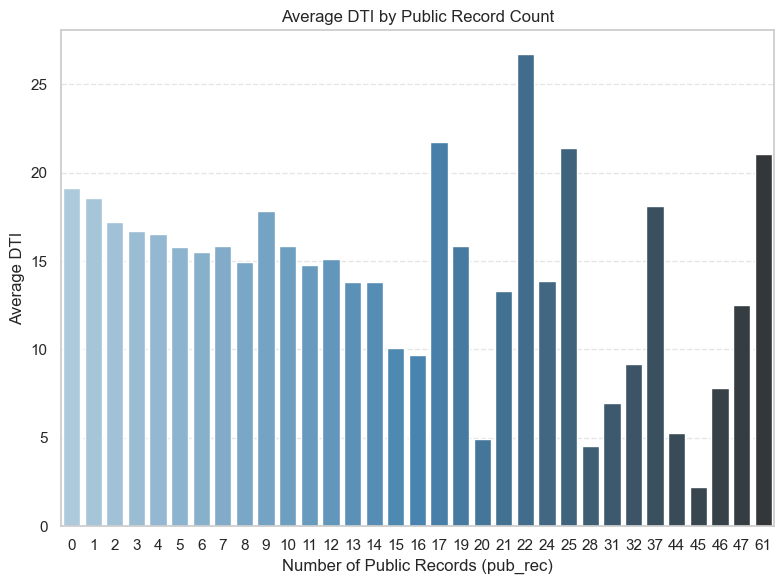

In [204]:
mean_dti = df.groupby('pub_rec')['dti'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_dti, x='pub_rec', y='dti', palette='Blues_d')

plt.title('Average DTI by Public Record Count')
plt.xlabel('Number of Public Records (pub_rec)')
plt.ylabel('Average DTI')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [207]:
df.groupby('revol_util')['dti'].mean().head()

revol_util
0.0    12.669059
0.1    11.789011
0.2    11.680894
0.3    11.389499
0.4    12.073935
Name: dti, dtype: float64

In [183]:
df.groupby('revol_util_category')['dti'].mean()

revol_util_category
High (76–100)       20.717846
Low (26–50)         18.635355
Moderate (51–75)    20.223138
No Usage (0)        13.073118
Very High (>100)    19.129130
Very Low (0–25)     15.749756
Name: dti, dtype: float64

In [184]:
avg_dti_by_total_acc = df.groupby('total_acc')['dti'].mean()
avg_dti_by_total_acc

total_acc
2       4.943017
3       8.391984
4      10.460420
5      11.949526
6      12.740948
         ...    
151    21.760000
157    26.810000
160    21.090000
173    31.950000
176    28.740000
Name: dti, Length: 133, dtype: float64

In [185]:
avg_dti = df.groupby(['total_acc', 'default_flag'])['dti'].mean().reset_index()

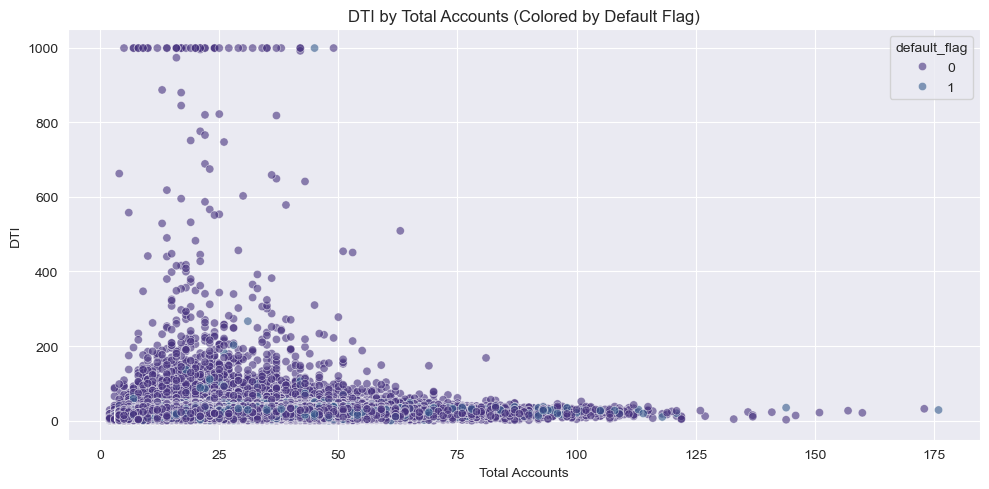

In [186]:
df.groupby('loan_amt_category')['revol_util'].mean()
plt.figure(figsize=(10, 5))
sns.scatterplot(x='total_acc', y='dti', data=df, hue='default_flag', alpha=0.6)
plt.title('DTI by Total Accounts (Colored by Default Flag)')
plt.xlabel('Total Accounts')
plt.ylabel('DTI')
plt.grid(True)
plt.tight_layout()
plt.show()

In [214]:
df.groupby('loan_amnt')['revol_util'].mean().head()

loan_amnt
1000    48.970962
1025    52.673333
1050    48.705000
1075    24.933333
1100    48.757143
Name: revol_util, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\3803726741.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loan_amnt', y='revol_util', data=grouped_data, palette='Blues_d')


Text(0, 0.5, 'Average Revolving Utilization (%)')

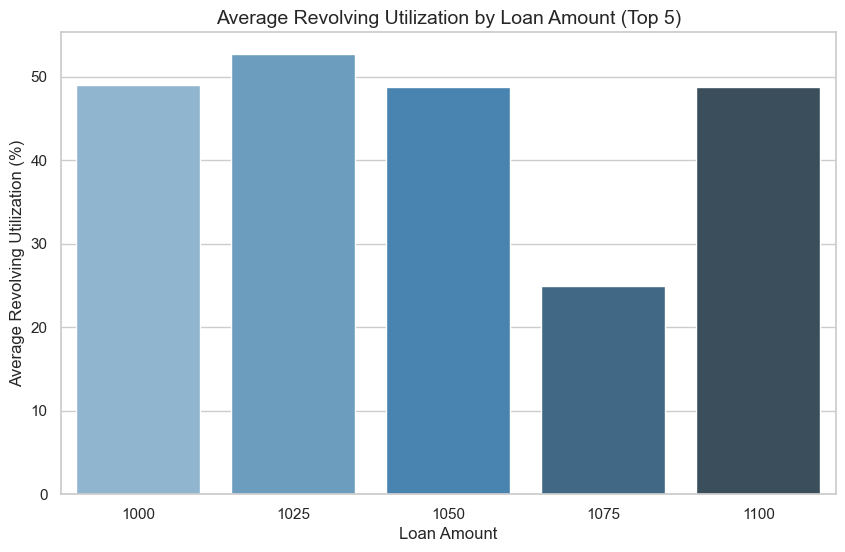

In [215]:
grouped_data = df.groupby('loan_amnt')['revol_util'].mean().head()

# Reset index for plotting
grouped_data = grouped_data.reset_index()

# Set the plot style
sns.set(style="whitegrid")

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_amnt', y='revol_util', data=grouped_data, palette='Blues_d')

# Add titles and labels
plt.title('Average Revolving Utilization by Loan Amount (Top 5)', fontsize=14)
plt.xlabel('Loan Amount')
plt.ylabel('Average Revolving Utilization (%)')

In [216]:
df.groupby('term')['revol_util'].mean()

term
36 months    48.939860
60 months    52.830793
Name: revol_util, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\3575611019.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='term', y='revol_util', palette='viridis')


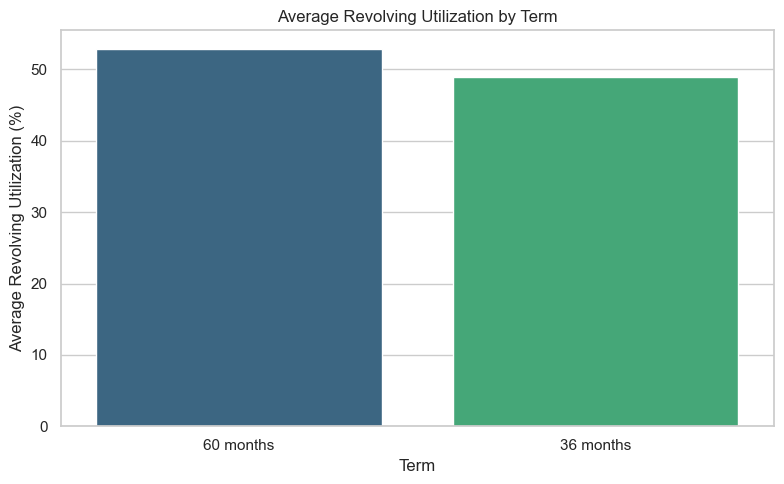

In [217]:
grouped_data = df.groupby('term')['revol_util'].mean().reset_index()

# Optional: sort values by mean for better visualization
grouped_data = grouped_data.sort_values('revol_util', ascending=False)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_data, x='term', y='revol_util', palette='viridis')

plt.title('Average Revolving Utilization by Term')
plt.xlabel('Term')
plt.ylabel('Average Revolving Utilization (%)')
plt.tight_layout()
plt.show()

In [219]:
df.groupby('int_rate')['revol_util'].mean().head()

int_rate
5.32    29.520380
6.00    54.043860
6.24    31.855556
6.49    38.968661
6.89    44.457143
Name: revol_util, dtype: float64

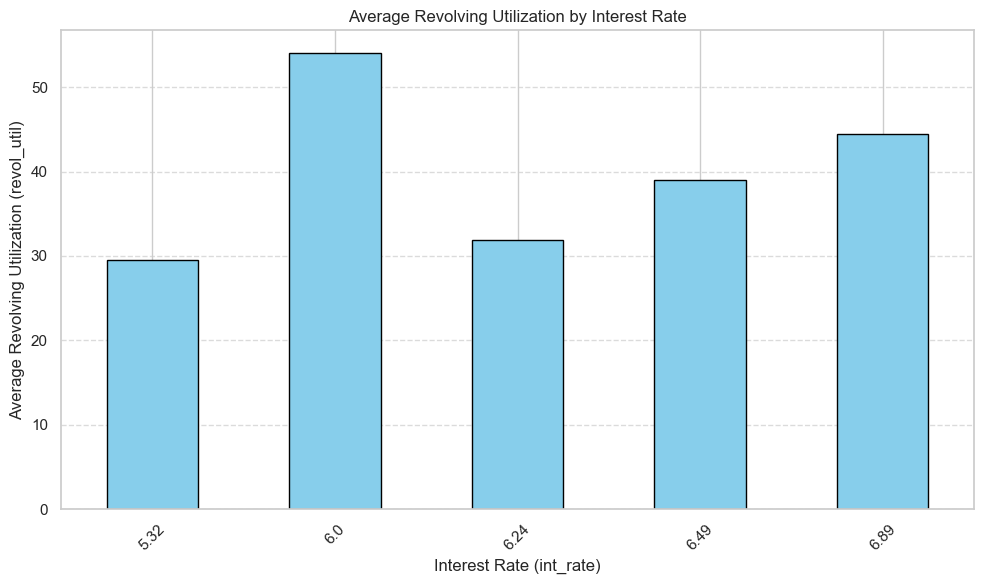

In [220]:
grouped_data = df.groupby('int_rate')['revol_util'].mean().head()

# Plotting
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Interest Rate (int_rate)')
plt.ylabel('Average Revolving Utilization (revol_util)')
plt.title('Average Revolving Utilization by Interest Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [221]:
df.groupby('emp_length')['revol_util'].mean()

emp_length
1 year       49.481528
10+ years    50.579493
2 years      49.075112
3 years      49.093713
4 years      49.062344
5 years      49.408203
6 years      49.544267
7 years      49.900151
8 years      50.281970
9 years      50.369370
< 1 year     50.025646
Name: revol_util, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\3295009389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='emp_length', y='revol_util', data=grouped_df, palette='coolwarm')


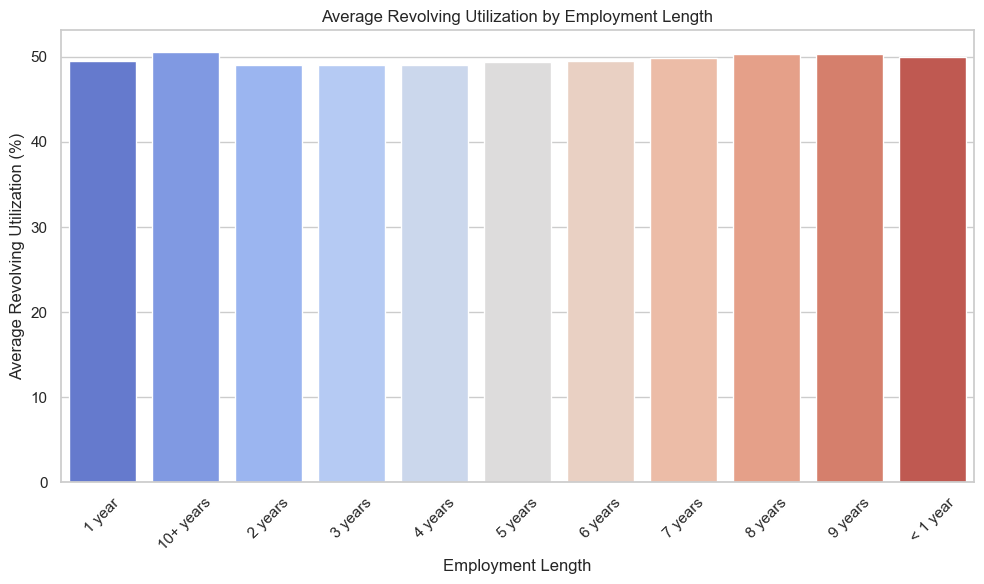

In [223]:
grouped_df = df.groupby('emp_length', as_index=False)['revol_util'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='emp_length', y='revol_util', data=grouped_df, palette='coolwarm')

plt.title('Average Revolving Utilization by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Average Revolving Utilization (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [224]:
df.groupby('grade')['revol_util'].mean()

grade
A    36.756799
B    49.223582
C    53.612670
D    55.636082
E    55.722948
F    56.099387
G    56.041611
Name: revol_util, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\3884944392.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='grade', y='revol_util', palette='viridis')


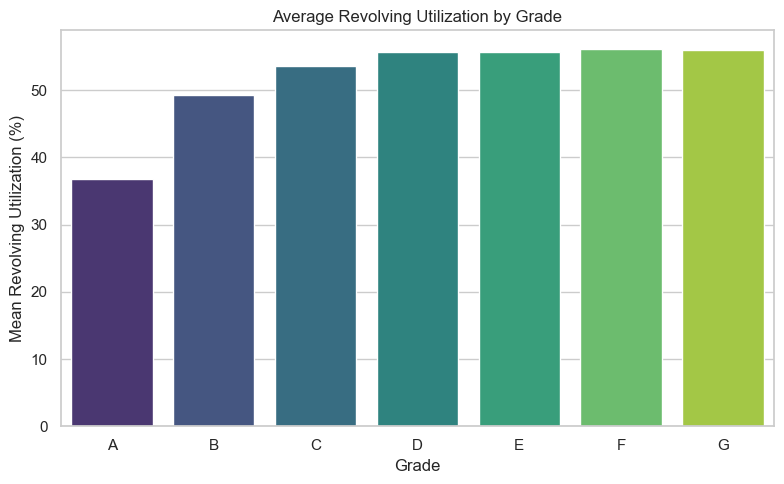

In [225]:
grouped_data = df.groupby('grade')['revol_util'].mean().reset_index()

# Optional: sort by grade if it's not already ordered
grouped_data = grouped_data.sort_values(by='grade')

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_data, x='grade', y='revol_util', palette='viridis')

plt.title('Average Revolving Utilization by Grade')
plt.xlabel('Grade')
plt.ylabel('Mean Revolving Utilization (%)')
plt.tight_layout()
plt.show()

In [226]:
df.groupby('sub_grade')['revol_util'].mean()

sub_grade
A1    29.520380
A2    33.925717
A3    37.991962
A4    40.163899
A5    42.601394
B1    45.639950
B2    47.926213
B3    49.171301
B4    50.556532
B5    52.002686
C1    52.378591
C2    53.221149
C3    53.679518
C4    54.428869
C5    54.601881
D1    55.268554
D2    55.431506
D3    55.437243
D4    56.576073
D5    55.900881
E1    55.406335
E2    55.717137
E3    55.308550
E4    56.070561
E5    56.284173
F1    55.904467
F2    55.840363
F3    56.239694
F4    56.559268
F5    56.208083
G1    55.997917
G2    56.702517
G3    56.018911
G4    55.310870
G5    56.076873
Name: revol_util, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\4147399919.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='sub_grade', y='revol_util', palette='Blues_d')


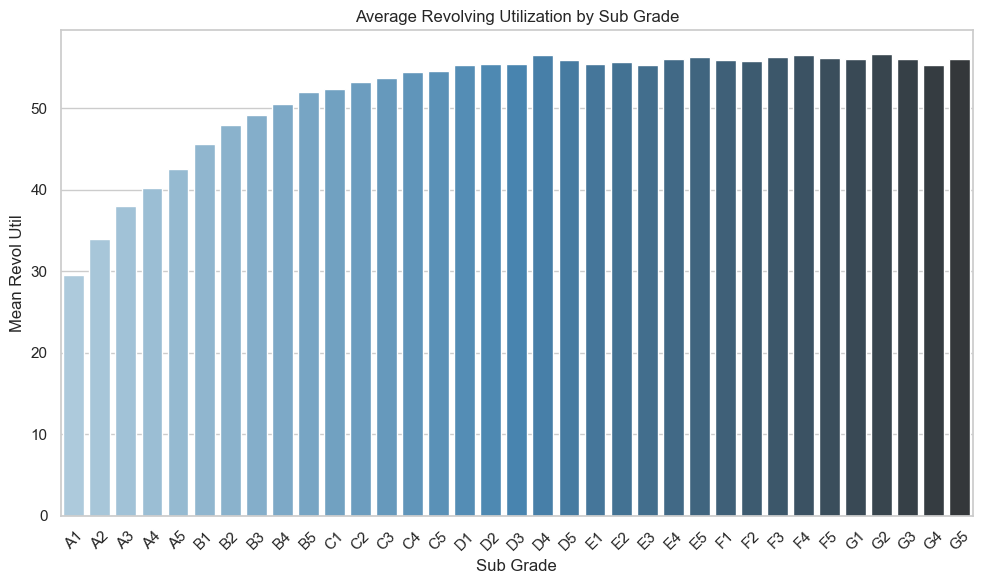

In [227]:
grouped_data = df.groupby('sub_grade')['revol_util'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='sub_grade', y='revol_util', palette='Blues_d')
plt.title('Average Revolving Utilization by Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Mean Revol Util')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [228]:
df.groupby('home_ownership')['revol_util'].mean()

home_ownership
ANY         46.687897
MORTGAGE    50.862621
NONE        48.100000
OWN         47.128839
RENT        49.682855
Name: revol_util, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\830215601.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='home_ownership', y='revol_util', data=grouped_data, palette='Blues_d')


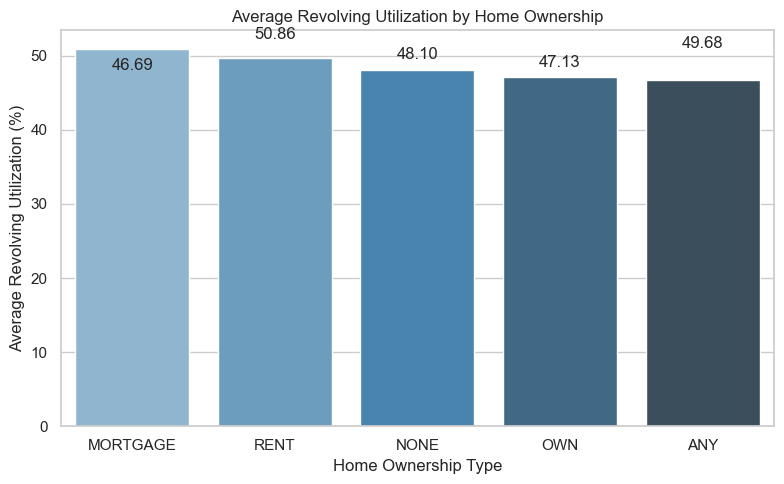

In [229]:
grouped_data = df.groupby('home_ownership')['revol_util'].mean().reset_index()

# Optional: Sorting the values for better visual clarity
grouped_data = grouped_data.sort_values(by='revol_util', ascending=False)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='home_ownership', y='revol_util', data=grouped_data, palette='Blues_d')

# Adding titles and labels
plt.title('Average Revolving Utilization by Home Ownership')
plt.xlabel('Home Ownership Type')
plt.ylabel('Average Revolving Utilization (%)')

# Optional: Add exact value labels on top of bars
for index, row in grouped_data.iterrows():
    plt.text(index, row['revol_util'] + 1, f"{row['revol_util']:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [230]:
df.groupby('annual_inc_category')['revol_util'].mean()

annual_inc_category
Above 89L              44.675000
High (20L-50L)         45.094118
Low (1L-3L)            52.892030
Lower-Mid (3L-5L)      53.584181
Mid (5L-10L)           53.372865
Upper-Mid (10L-20L)    50.144444
Very High (50L-89L)    52.315385
Very Low (0-1L)        49.170628
Name: revol_util, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\4294660937.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='annual_inc_category', y='revol_util', palette='viridis')


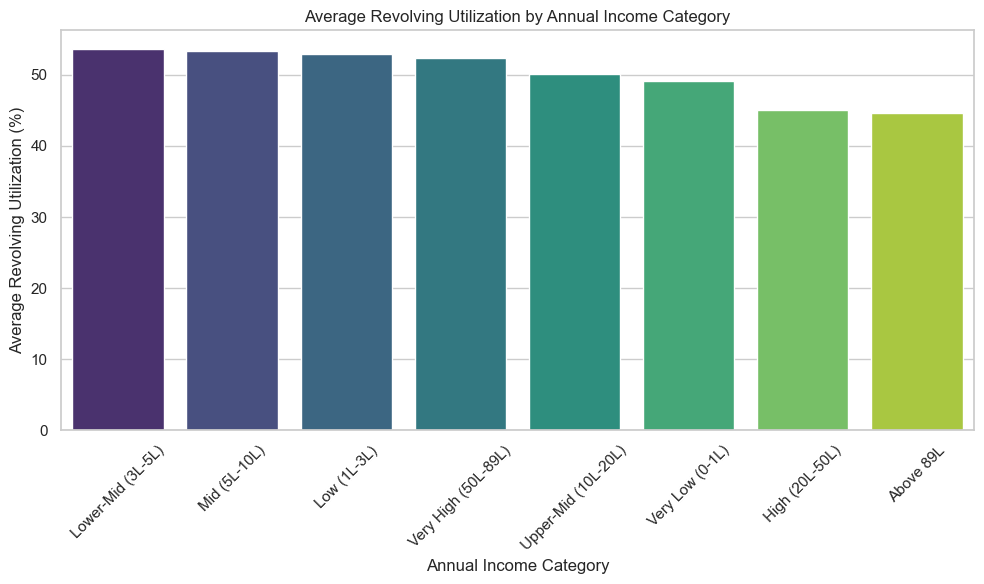

In [232]:
grouped_data = df.groupby('annual_inc_category')['revol_util'].mean().reset_index()

# Sort the data (optional, for better visual)
grouped_data = grouped_data.sort_values('revol_util', ascending=False)

# Set plot style
sns.set(style="whitegrid")

# Create barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='annual_inc_category', y='revol_util', palette='viridis')

# Add labels and title
plt.xlabel('Annual Income Category')
plt.ylabel('Average Revolving Utilization (%)')
plt.title('Average Revolving Utilization by Annual Income Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [233]:
df.groupby('annual_inc')['revol_util'].mean()

annual_inc
0.0            56.520414
1.0            51.278571
6.0            21.800000
10.0           57.700000
15.0           59.600000
                 ...    
9550000.0       0.900000
9573072.0      61.900000
10999200.0     41.100000
61000000.0     35.100000
110000000.0    83.500000
Name: revol_util, Length: 42357, dtype: float64

In [234]:
df.groupby('dti_category')['revol_util'].mean()

dti_category
High (20–30)         53.096730
Low (5–10)           44.166980
Moderate (10–20)     49.520107
Risky (>50)          58.311331
Unknown              62.000000
Very High (30–50)    55.756532
Very Low (0–5)       33.584110
Name: revol_util, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\3280838631.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_df, x='dti_category', y='revol_util', palette='viridis')


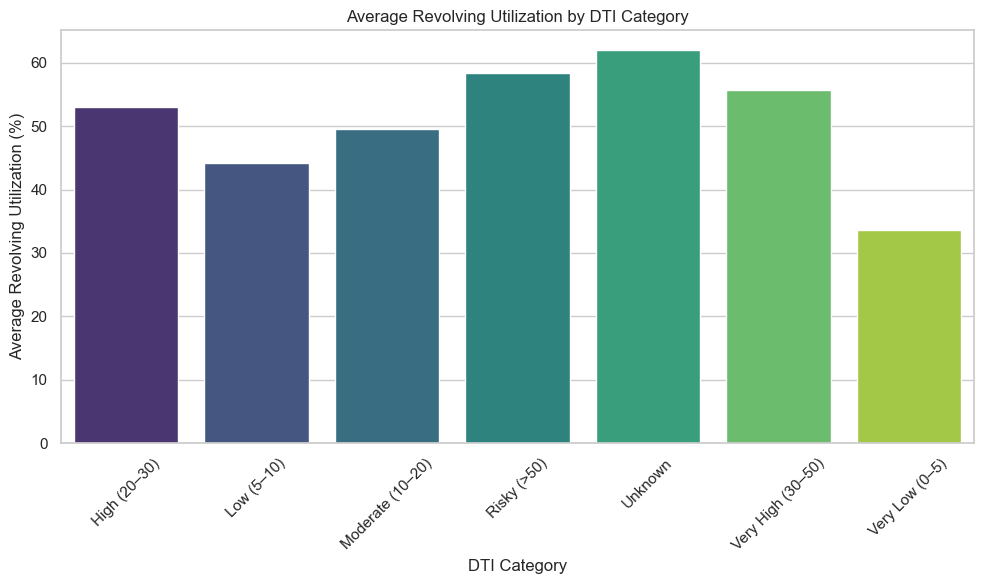

In [235]:
grouped_df = df.groupby('dti_category')['revol_util'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='dti_category', y='revol_util', palette='viridis')
plt.title('Average Revolving Utilization by DTI Category')
plt.xlabel('DTI Category')
plt.ylabel('Average Revolving Utilization (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [236]:
df.groupby('delinq_2yrs_category')['revol_util'].mean()

delinq_2yrs_category
Few Delinquencies (2–3)          49.608216
High Delinquencies (11–20)       46.169043
Many Delinquencies (7–10)        48.877992
No Delinquencies (0)             50.034750
One Delinquency (1)              49.781981
Several Delinquencies (4–6)      48.867111
Very High Delinquencies (21+)    57.023077
Name: revol_util, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\508371394.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='delinq_2yrs_category', y='revol_util', data=grouped_data, palette='viridis')


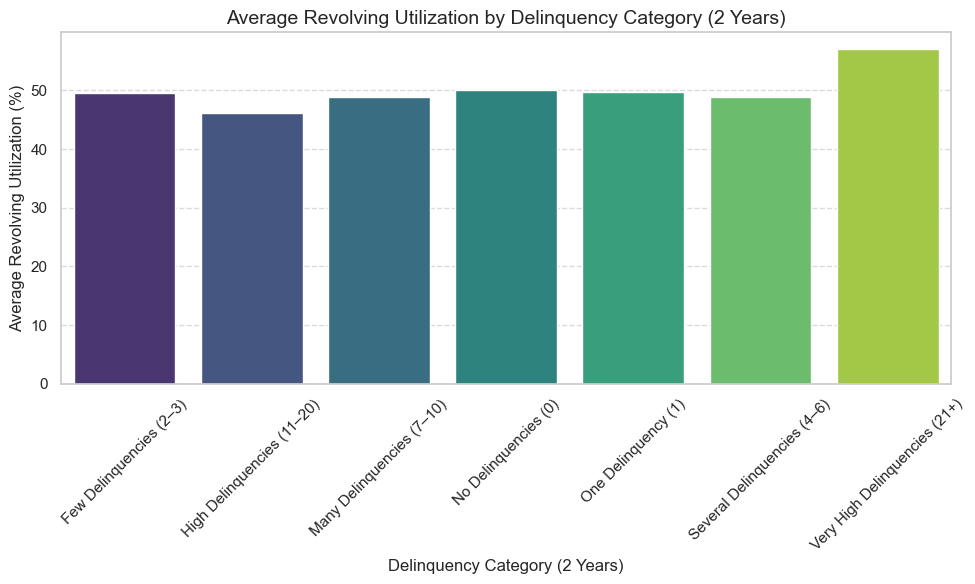

In [237]:
grouped_data = df.groupby('delinq_2yrs_category')['revol_util'].mean().reset_index()

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='delinq_2yrs_category', y='revol_util', data=grouped_data, palette='viridis')

plt.title('Average Revolving Utilization by Delinquency Category (2 Years)', fontsize=14)
plt.xlabel('Delinquency Category (2 Years)')
plt.ylabel('Average Revolving Utilization (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [64]:
df.groupby('earliest_cr_line')['revol_util'].mean()

earliest_cr_line
1969-01-01    48.080851
1969-02-01    41.761290
1969-03-01    46.895556
1969-04-01    49.742000
1969-05-01    44.906000
                ...    
2068-08-01    37.865385
2068-09-01    52.046154
2068-10-01    57.112903
2068-11-01    42.022857
2068-12-01    44.054839
Name: revol_util, Length: 699, dtype: float64

In [65]:
df.groupby('open_acc_category')['revol_util'].mean()

open_acc_category
Extremely Many (41+)    34.320287
Few (4–6)               55.140331
Many (11–20)            47.927171
Moderate (7–10)         51.873520
No Accounts             49.600000
Very Few (1–3)          57.609454
Very Many (21–40)       42.768799
Name: revol_util, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\2441803434.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='open_acc_category', y='revol_util', data=grouped_data, palette='viridis')


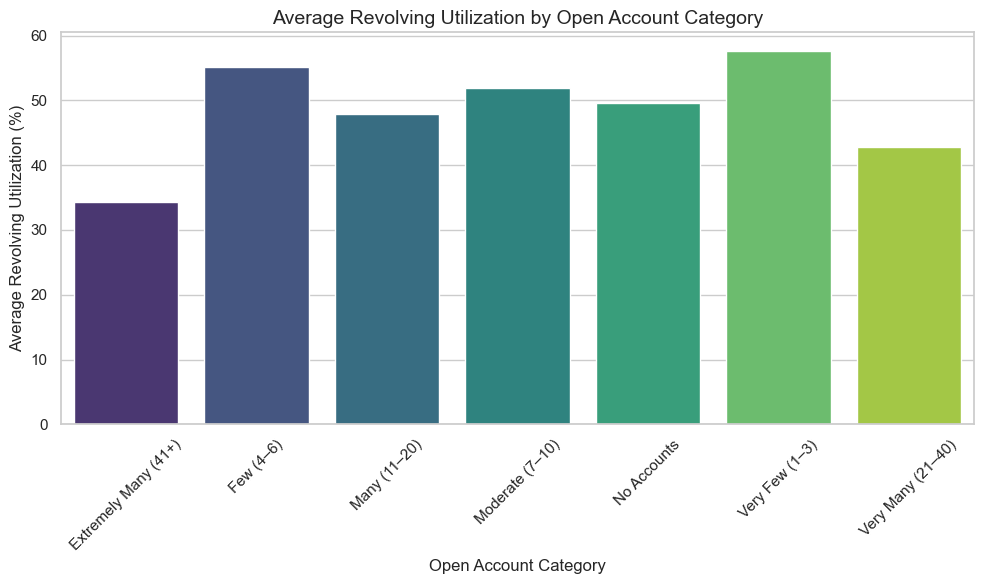

In [239]:
grouped_data = df.groupby('open_acc_category')['revol_util'].mean().reset_index()

# Set plot style
sns.set(style="whitegrid")

# Create barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='open_acc_category', y='revol_util', data=grouped_data, palette='viridis')

# Add titles and labels
plt.title('Average Revolving Utilization by Open Account Category', fontsize=14)
plt.xlabel('Open Account Category', fontsize=12)
plt.ylabel('Average Revolving Utilization (%)', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [66]:
df.groupby('pub_rec')['revol_util'].mean()

pub_rec
0     50.743648
1     46.428860
2     46.621531
3     47.246663
4     46.997157
5     47.770063
6     44.701027
7     48.289778
8     46.577586
9     49.154321
10    47.190909
11    50.151429
12    55.210526
13    56.653333
14    37.755556
15    59.225000
16    45.583333
17    35.700000
19    39.966667
20    14.800000
21    58.350000
22    42.450000
24    69.766667
25    31.700000
28    34.866667
31    57.000000
32     7.800000
37    49.100000
44    52.600000
45    48.300000
46    78.600000
47    38.000000
61    65.000000
Name: revol_util, dtype: float64

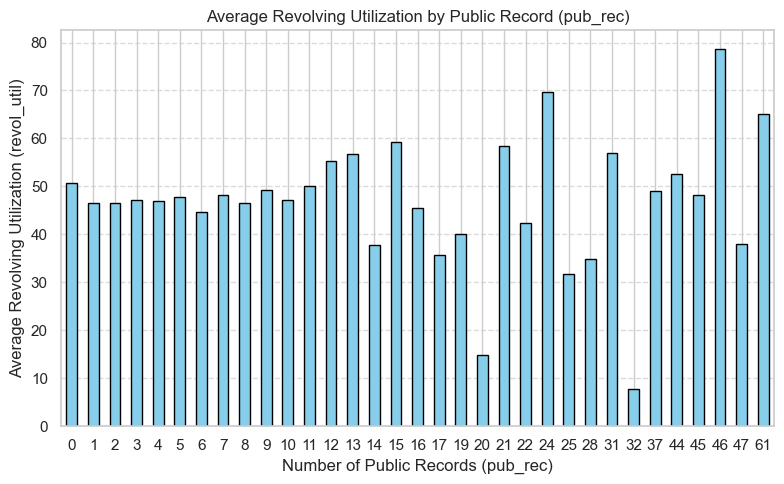

In [240]:
grouped_data = df.groupby('pub_rec')['revol_util'].mean()

# Plotting
plt.figure(figsize=(8,5))
grouped_data.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Revolving Utilization by Public Record (pub_rec)')
plt.xlabel('Number of Public Records (pub_rec)')
plt.ylabel('Average Revolving Utilization (revol_util)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [244]:
df.groupby('total_acc')['revol_util'].mean().head()

total_acc
2    56.046552
3    57.677135
4    59.237374
5    56.500356
6    55.276777
Name: revol_util, dtype: float64

In [68]:
df.groupby('loan_amt_category')['open_acc'].mean()

loan_amt_category
High (20001–30000)         13.098052
Low (5001–10000)           11.006708
Moderate (10001–20000)     12.086226
Very High (30001–40000)    13.801975
Very Low (1000–5000)       10.322748
Name: open_acc, dtype: float64

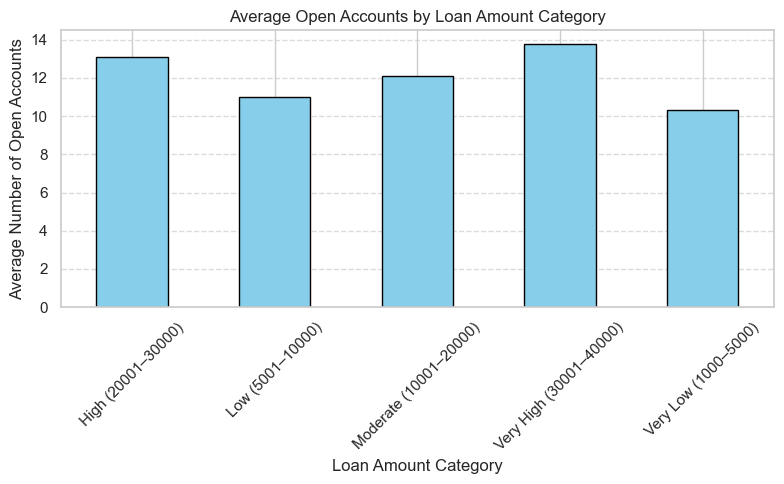

In [247]:
grouped_data = df.groupby('loan_amt_category')['open_acc'].mean()

# Plotting
plt.figure(figsize=(8, 5))
grouped_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Open Accounts by Loan Amount Category')
plt.xlabel('Loan Amount Category')
plt.ylabel('Average Number of Open Accounts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [69]:
df.groupby('int_rate_category')['open_acc'].mean()

int_rate_category
High (20.01–25)        12.001842
Low (10.01–15)         11.590549
Moderate (15.01–20)    11.814198
Very High (>25)        12.250738
Very Low (5.32–10)     12.101119
Name: open_acc, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\3066574190.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='int_rate_category', y='open_acc', palette='viridis')


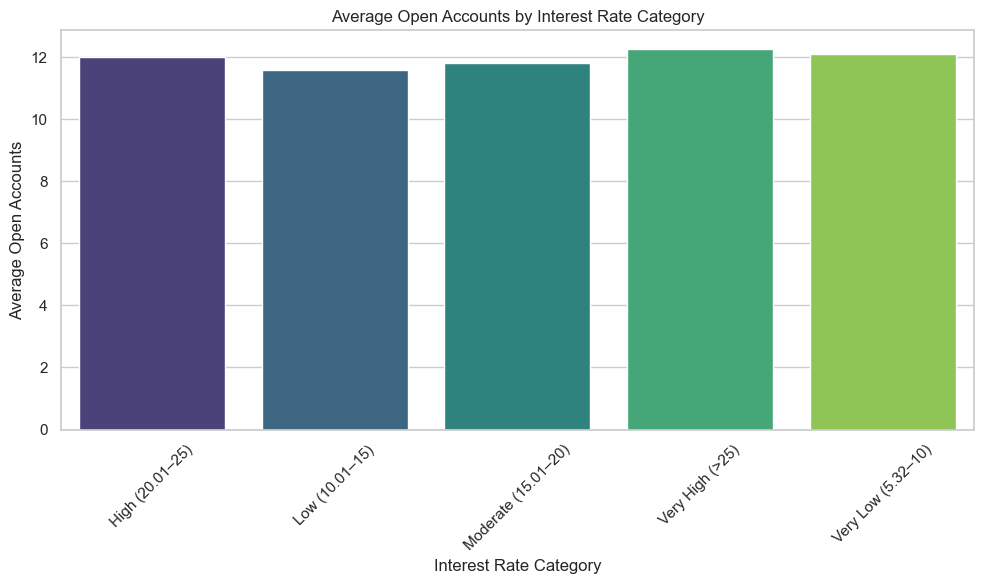

In [248]:
grouped_data = df.groupby('int_rate_category')['open_acc'].mean().reset_index()

# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='int_rate_category', y='open_acc', palette='viridis')

# Add labels and title
plt.xlabel('Interest Rate Category')
plt.ylabel('Average Open Accounts')
plt.title('Average Open Accounts by Interest Rate Category')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()

In [70]:
df.groupby('emp_length')['open_acc'].mean()

emp_length
1 year       11.637521
10+ years    11.953222
2 years      11.720033
3 years      11.665319
4 years      11.757488
5 years      11.772253
6 years      11.840630
7 years      11.871569
8 years      11.970251
9 years      12.063073
< 1 year     11.471654
Name: open_acc, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\3365551551.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='emp_length', y='open_acc', data=grouped_data, palette='viridis')


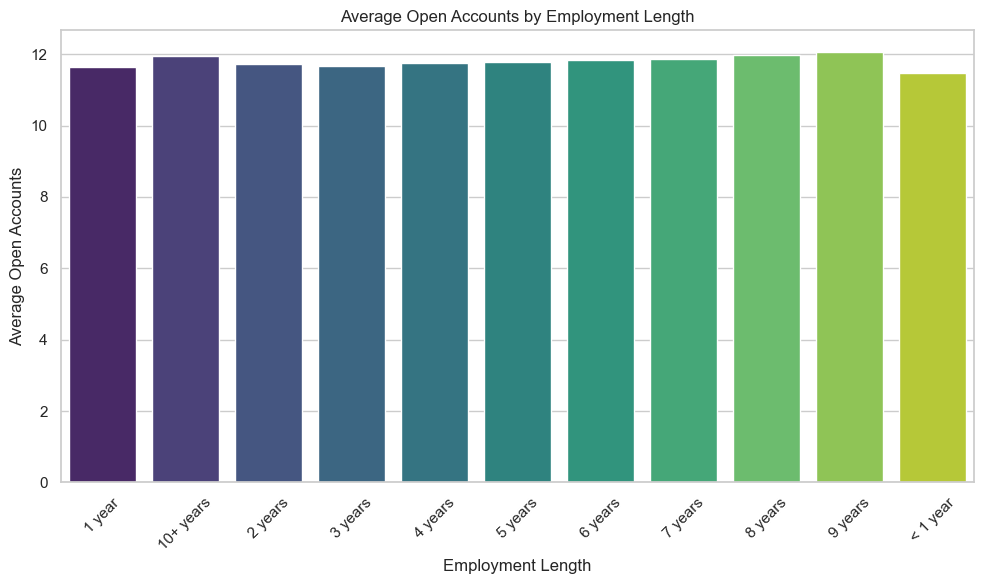

In [249]:
grouped_data = df.groupby('emp_length')['open_acc'].mean().reset_index()

# Sort emp_length if it's not numeric (optional cleanup if needed)
# grouped_data = grouped_data.sort_values(by='emp_length')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='emp_length', y='open_acc', data=grouped_data, palette='viridis')

plt.title('Average Open Accounts by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Average Open Accounts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
df.groupby('home_ownership')['open_acc'].mean()

home_ownership
ANY         12.005952
MORTGAGE    12.558713
NONE        10.750000
OWN         11.707702
RENT        10.936069
Name: open_acc, dtype: float64

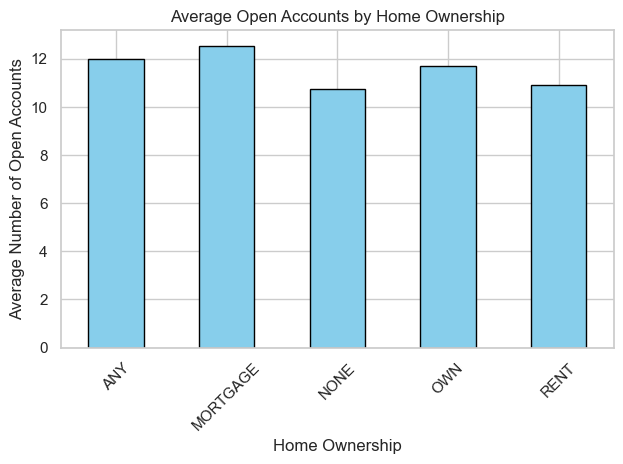

In [250]:
mean_open_acc = df.groupby('home_ownership')['open_acc'].mean()

# Plot
mean_open_acc.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Open Accounts by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Average Number of Open Accounts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
df.groupby('annual_inc_category')['open_acc'].mean()

annual_inc_category
Above 89L              11.375000
High (20L-50L)         15.205882
Low (1L-3L)            13.720601
Lower-Mid (3L-5L)      14.829381
Mid (5L-10L)           14.848197
Upper-Mid (10L-20L)    13.305556
Very High (50L-89L)    12.653846
Very Low (0-1L)        11.308683
Name: open_acc, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\1611518359.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='annual_inc_category', y='open_acc', palette='viridis')


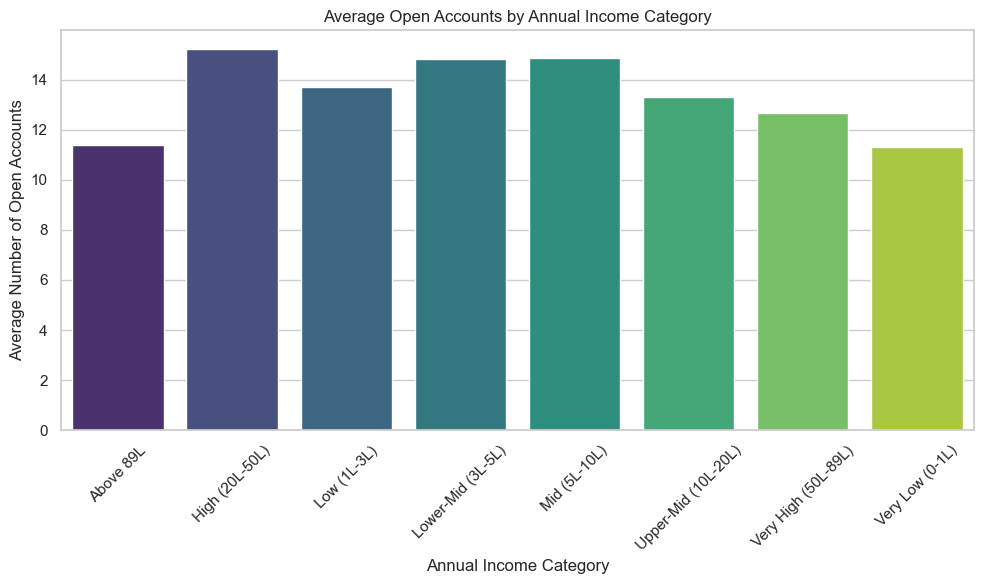

In [251]:
grouped_data = df.groupby('annual_inc_category')['open_acc'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='annual_inc_category', y='open_acc', palette='viridis')

plt.title('Average Open Accounts by Annual Income Category')
plt.xlabel('Annual Income Category')
plt.ylabel('Average Number of Open Accounts')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [73]:
df.groupby('loan_status')['open_acc'].mean()

loan_status
Charged Off           12.173025
Current               11.775788
Default               12.833333
Fully Paid            11.888202
In Grace Period       11.958245
Late (16-30 days)     11.916151
Late (31-120 days)    12.045982
Name: open_acc, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\873049064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loan_status', y='open_acc', data=grouped_data, palette='viridis')


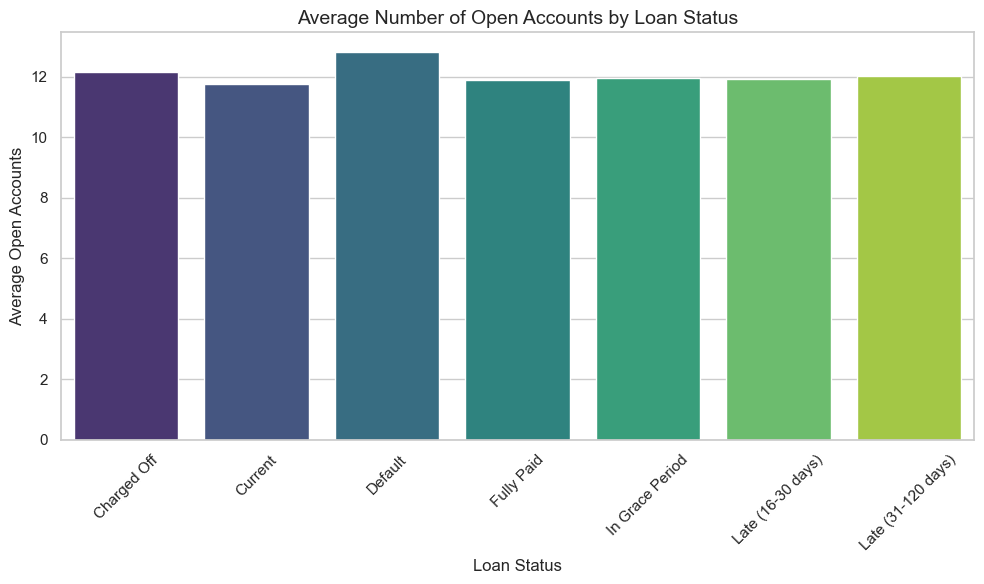

In [252]:
grouped_data = df.groupby('loan_status')['open_acc'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='open_acc', data=grouped_data, palette='viridis')

plt.title('Average Number of Open Accounts by Loan Status', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Average Open Accounts', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
df.groupby('addr_state')['open_acc'].mean()

addr_state
AK    10.727588
AL    11.458228
AR    11.295716
AZ    11.343817
CA    11.429012
CO    11.659676
CT    12.528619
DC    11.850799
DE    12.235376
FL    11.809888
GA    12.052763
HI    10.045050
ID    11.336565
IL    12.404597
IN    11.940323
KS    11.452610
KY    11.831738
LA    11.236110
MA    11.839707
MD    12.203618
ME    11.434676
MI    12.072047
MN    11.854074
MO    11.713233
MS    11.271437
MT    10.623719
NC    11.549715
ND    11.320022
NE    11.473641
NH    11.838599
NJ    12.588861
NM    11.397701
NV    11.304644
NY    12.057770
OH    12.151656
OK    11.145588
OR    11.233870
PA    12.207496
RI    12.087563
SC    11.772008
SD    11.081279
TN    11.546739
TX    12.117284
UT    11.559446
VA    11.938558
VT    10.976107
WA    11.166656
WI    11.964719
WV    12.206494
WY    10.798440
Name: open_acc, dtype: float64

In [75]:
df.groupby('delinq_2yrs_category')['open_acc'].mean()

delinq_2yrs_category
Few Delinquencies (2–3)          12.558599
High Delinquencies (11–20)       16.163227
Many Delinquencies (7–10)        13.964768
No Delinquencies (0)             11.659017
One Delinquency (1)              12.302236
Several Delinquencies (4–6)      12.750490
Very High Delinquencies (21+)    20.692308
Name: open_acc, dtype: float64

C:\Users\aasak\AppData\Local\Temp\ipykernel_25424\3137350136.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='open_acc',y='delinq_2yrs_category', data=grouped_data, palette='viridis')


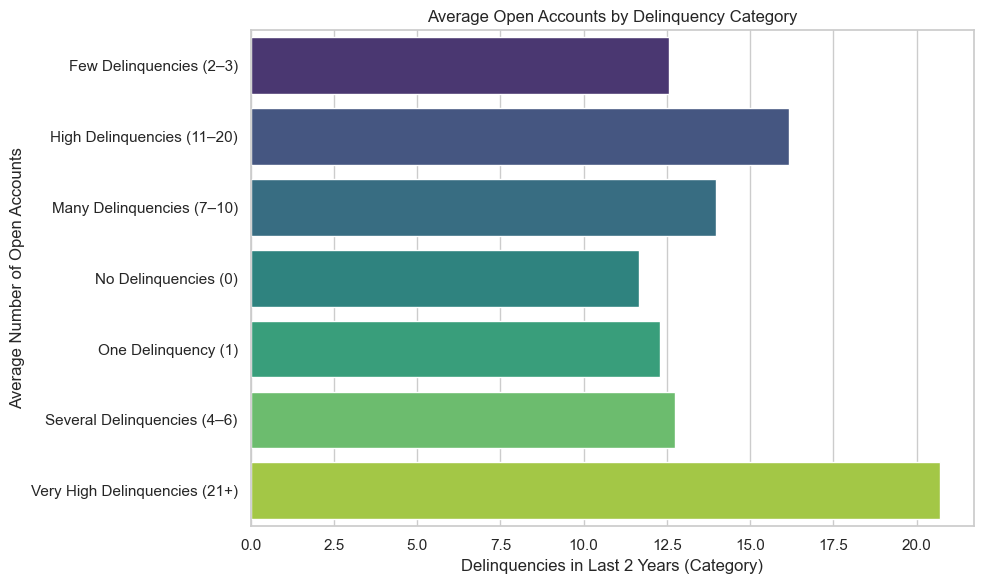

In [254]:
grouped_data = df.groupby('delinq_2yrs_category')['open_acc'].mean().reset_index()

# Set the plot style
sns.set(style="whitegrid")

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='open_acc',y='delinq_2yrs_category', data=grouped_data, palette='viridis')

# Set labels and title
plt.xlabel('Delinquencies in Last 2 Years (Category)')
plt.ylabel('Average Number of Open Accounts')
plt.title('Average Open Accounts by Delinquency Category')

# Show the plot
plt.tight_layout()
plt.show()

In [76]:
df.groupby('dti_category')['open_acc'].mean()

dti_category
High (20–30)         13.177952
Low (5–10)            9.474092
Moderate (10–20)     11.351316
Risky (>50)          12.818817
Unknown              12.000000
Very High (30–50)    14.099047
Very Low (0–5)        7.691182
Name: open_acc, dtype: float64

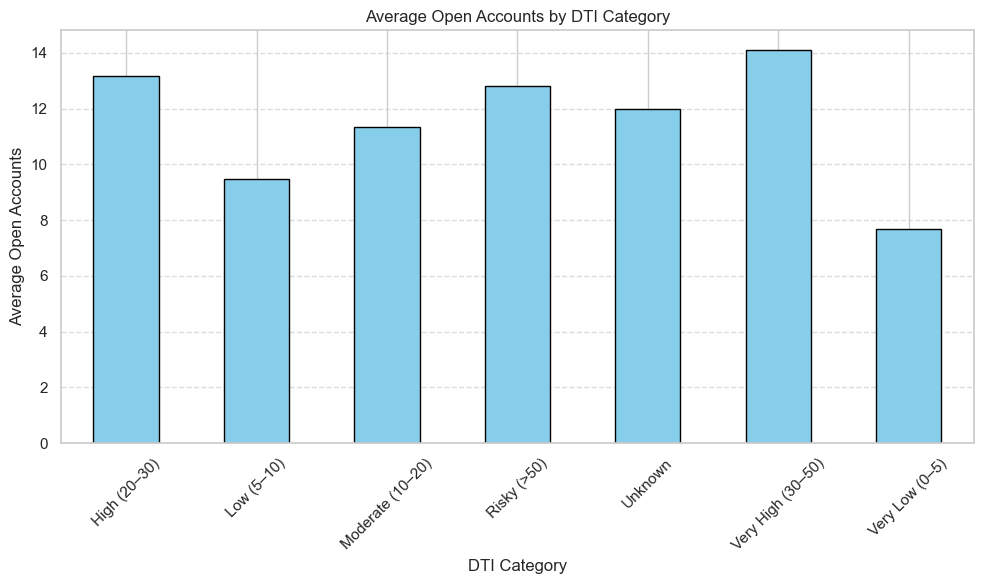

In [255]:
grouped_data = df.groupby('dti_category')['open_acc'].mean()

# Plotting
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Average Open Accounts by DTI Category')
plt.xlabel('DTI Category')
plt.ylabel('Average Open Accounts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

# STATISTICS

In [77]:
df['default_flag'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Late', 'Default'] else 0)

In [78]:
temp_df = df[df['default_flag'] == 1].shape[0]
temp_df

37233

In [79]:
df_ = df.shape[0]
df_

759338

In [80]:
df_ - temp_df

722105

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    759338 non-null  int64         
 1   loan_amnt             759338 non-null  int64         
 2   loan_amt_category     759338 non-null  object        
 3   term                  759338 non-null  object        
 4   int_rate              759338 non-null  float64       
 5   int_rate_category     759338 non-null  object        
 6   grade                 759338 non-null  object        
 7   sub_grade             759338 non-null  object        
 8   emp_length            759338 non-null  object        
 9   home_ownership        759338 non-null  object        
 10  annual_inc            759338 non-null  float64       
 11  annual_inc_category   759338 non-null  object        
 12  verification_status   759338 non-null  object        
 13 

In [82]:
df.describe()

,id,loan_amnt,int_rate,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,default_flag
count,7.593380e+05,759338.000000,759338.000000,7.593380e+05,759338,759338.000000,759338.000000,759338,759338.000000,759338.000000,759338.000000,759338.000000,759338.000000
mean,9.317508e+07,14707.775260,13.187041,7.996778e+04,2016-10-30 04:29:46.701574144,18.980429,0.357795,2000-06-02 21:55:05.320160640,11.822423,0.244998,49.954952,24.136807,0.049034
min,5.571600e+04,1000.000000,5.320000,0.000000e+00,2016-01-01 00:00:00,-1.000000,0.000000,1969-01-01 00:00:00,0.000000,0.000000,0.000000,2.000000,0.000000
25%,7.880009e+07,7500.000000,9.750000,4.800000e+04,2016-05-01 00:00:00,12.270000,0.000000,1996-04-01 00:00:00,8.000000,0.000000,31.500000,15.000000,0.000000
50%,9.279886e+07,12000.000000,12.620000,6.700000e+04,2016-11-01 00:00:00,18.180000,0.000000,2001-10-01 00:00:00,11.000000,0.000000,49.600000,22.000000,0.000000
75%,1.072904e+08,20000.000000,15.590000,9.500000e+04,2017-05-01 00:00:00,24.770000,0.000000,2005-07-01 00:00:00,15.000000,0.000000,68.400000,31.000000,0.000000
max,1.201229e+08,40000.000000,30.990000,1.100000e+08,2017-09-01 00:00:00,999.000000,42.000000,2068-12-01 00:00:00,97.000000,61.000000,173.200000,176.000000,1.000000
std,1.536975e+07,9215.456493,5.054311,1.634141e+05,NaN,13.360285,0.951763,NaN,5.771757,0.660138,24.302216,11.955676,0.215938


In [83]:
df['default_flag'].value_counts(normalize=True)

default_flag
0    0.950966
1    0.049034
Name: proportion, dtype: float64

In [84]:
df.groupby('default_flag')[['loan_amnt', 'int_rate', 'annual_inc', 'dti','open_acc']].agg(['mean', 'median', 'std','var'])

loan_amnt                                       int_rate  \
                      mean   median          std           var       mean   
default_flag                                                                
0             14657.155504  12000.0  9214.729461  8.491124e+07  13.026444   
1             15689.505949  14250.0  9174.599617  8.417328e+07  16.301687   

                                            annual_inc           \
             median       std        var          mean   median   
default_flag                                                      
0             12.62  4.979151  24.791942  80302.168858  67000.0   
1             15.31  5.474597  29.971211  73482.530487  62000.0   

                                                 dti                    \
                        std           var       mean median        std   
default_flag                                                             
0             166697.709166  2.778813e+10  18.878973  18.06  13.474370   
1              75085.202218  5.637788e+09  20.948093  20.74  10.726379   

                           open_acc                              
                     var       mean median       std        var  
default_flag                                                     
0             181.558644  11.804312   11.0  5.766269  33.249857  
1             115.055213  12.173663   11.0  5.866210  34.412417

In [85]:
default_by_term = df.groupby('term')['default_flag'].mean()
print(default_by_term) # it gives the mean only if the value is 1 right

term
36 months    0.044906
60 months    0.060727
Name: default_flag, dtype: float64


In [86]:
default_by_term = df.groupby('loan_amt_category')['default_flag'].mean()
print(default_by_term)

loan_amt_category
High (20001–30000)         0.055934
Low (5001–10000)           0.044635
Moderate (10001–20000)     0.051842
Very High (30001–40000)    0.057232
Very Low (1000–5000)       0.038859
Name: default_flag, dtype: float64


In [87]:
default_by_term = df.groupby('int_rate_category')['default_flag'].mean()
print(default_by_term)

int_rate_category
High (20.01–25)        0.128616
Low (10.01–15)         0.041763
Moderate (15.01–20)    0.073123
Very High (>25)        0.119742
Very Low (5.32–10)     0.019737
Name: default_flag, dtype: float64


In [88]:
default_by_term = df.groupby('grade')['default_flag'].mean()
print(default_by_term)

grade
A    0.013340
B    0.029384
C    0.047954
D    0.085496
E    0.127091
F    0.180058
G    0.152068
Name: default_flag, dtype: float64


In [89]:
default_by_term = df.groupby('sub_grade')['default_flag'].mean()
print(default_by_term)

sub_grade
A1    0.007847
A2    0.012234
A3    0.013088
A4    0.016290
A5    0.017546
B1    0.019966
B2    0.024215
B3    0.028220
B4    0.034303
B5    0.037613
C1    0.040418
C2    0.049177
C3    0.047877
C4    0.051932
C5    0.051872
D1    0.082974
D2    0.077787
D3    0.076400
D4    0.101337
D5    0.099899
E1    0.125012
E2    0.127617
E3    0.131107
E4    0.134409
E5    0.118633
F1    0.170349
F2    0.191794
F3    0.167822
F4    0.184457
F5    0.193691
G1    0.154570
G2    0.182292
G3    0.151485
G4    0.143892
G5    0.119435
Name: default_flag, dtype: float64


In [90]:
default_by_term = df.groupby('emp_length')['default_flag'].mean()
print(default_by_term)

emp_length
1 year       0.053889
10+ years    0.047556
2 years      0.050307
3 years      0.051838
4 years      0.047813
5 years      0.049351
6 years      0.046848
7 years      0.047527
8 years      0.055039
9 years      0.050186
< 1 year     0.047382
Name: default_flag, dtype: float64


In [91]:
default_by_term = df.groupby('home_ownership')['default_flag'].mean()
print(default_by_term)

home_ownership
ANY         0.031746
MORTGAGE    0.041068
NONE        0.000000
OWN         0.051924
RENT        0.058149
Name: default_flag, dtype: float64


In [92]:
default_by_term = df.groupby('annual_inc_category')['default_flag'].mean()
print(default_by_term)

annual_inc_category
Above 89L              0.000000
High (20L-50L)         0.088235
Low (1L-3L)            0.038342
Lower-Mid (3L-5L)      0.029473
Mid (5L-10L)           0.029412
Upper-Mid (10L-20L)    0.037037
Very High (50L-89L)    0.076923
Very Low (0-1L)        0.051947
Name: default_flag, dtype: float64


In [93]:
default_by_term = df.groupby('verification_status')['default_flag'].mean()
print(default_by_term)

verification_status
Not Verified       0.032814
Source Verified    0.049851
Verified           0.067000
Name: default_flag, dtype: float64


In [94]:
default_by_term = df.groupby('loan_status')['default_flag'].mean()
print(default_by_term)

loan_status
Charged Off           1.0
Current               0.0
Default               1.0
Fully Paid            0.0
In Grace Period       0.0
Late (16-30 days)     0.0
Late (31-120 days)    0.0
Name: default_flag, dtype: float64


In [95]:
default_by_term = df.groupby('purpose')['default_flag'].mean()
print(default_by_term)

purpose
car                   0.035775
credit_card           0.041149
debt_consolidation    0.051843
home_improvement      0.042205
house                 0.060376
major_purchase        0.048693
medical               0.059459
moving                0.065294
other                 0.050691
renewable_energy      0.071291
small_business        0.076138
vacation              0.045979
wedding               0.000000
Name: default_flag, dtype: float64


In [96]:
default_by_term = df.groupby('addr_state')['default_flag'].mean()
print(default_by_term)

addr_state
AK    0.057259
AL    0.059236
AR    0.060084
AZ    0.048107
CA    0.053257
CO    0.041621
CT    0.033612
DC    0.027827
DE    0.043175
FL    0.053402
GA    0.043419
HI    0.051937
ID    0.046168
IL    0.043299
IN    0.050357
KS    0.036503
KY    0.047728
LA    0.057757
MA    0.045287
MD    0.049618
ME    0.023199
MI    0.047932
MN    0.053003
MO    0.048746
MS    0.053112
MT    0.044900
NC    0.052706
ND    0.048808
NE    0.051902
NH    0.031596
NJ    0.047754
NM    0.058493
NV    0.059770
NY    0.051418
OH    0.051548
OK    0.061656
OR    0.034552
PA    0.048286
RI    0.039181
SC    0.037788
SD    0.048634
TN    0.049254
TX    0.049965
UT    0.049696
VA    0.047750
VT    0.027389
WA    0.040363
WI    0.034986
WV    0.087013
WY    0.049415
Name: default_flag, dtype: float64


In [97]:
default_by_term = df.groupby('dti_category')['default_flag'].mean()
print(default_by_term)

dti_category
High (20–30)         0.055336
Low (5–10)           0.035574
Moderate (10–20)     0.041664
Risky (>50)          0.014856
Unknown              0.000000
Very High (30–50)    0.080482
Very Low (0–5)       0.039624
Name: default_flag, dtype: float64


In [98]:
default_by_term = df.groupby('delinq_2yrs_category')['default_flag'].mean()
print(default_by_term)

delinq_2yrs_category
Few Delinquencies (2–3)          0.051763
High Delinquencies (11–20)       0.063790
Many Delinquencies (7–10)        0.057432
No Delinquencies (0)             0.048645
One Delinquency (1)              0.049495
Several Delinquencies (4–6)      0.053061
Very High Delinquencies (21+)    0.153846
Name: default_flag, dtype: float64


In [99]:
default_by_term = df.groupby('open_acc_category')['default_flag'].mean()
print(default_by_term)

open_acc_category
Extremely Many (41+)    0.058373
Few (4–6)               0.044045
Many (11–20)            0.051051
Moderate (7–10)         0.047402
No Accounts             0.000000
Very Few (1–3)          0.042145
Very Many (21–40)       0.054659
Name: default_flag, dtype: float64


In [100]:
default_by_term = df.groupby('revol_util_category')['default_flag'].mean()
print(default_by_term)

revol_util_category
High (76–100)       0.055343
Low (26–50)         0.046758
Moderate (51–75)    0.052309
No Usage (0)        0.051578
Very High (>100)    0.066944
Very Low (0–25)     0.040524
Name: default_flag, dtype: float64


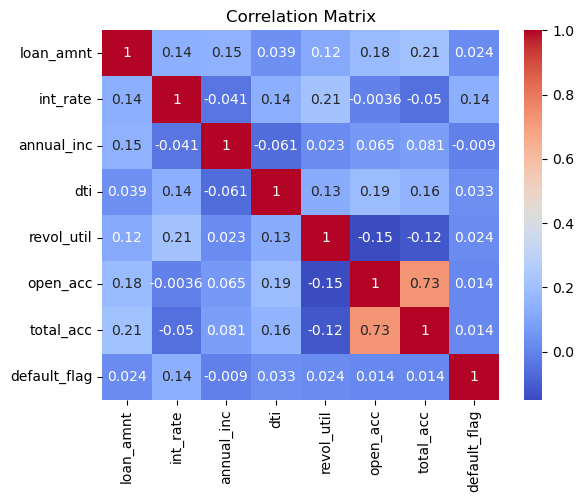

In [101]:
num_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util', 'open_acc', 'total_acc', 'default_flag']
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [102]:
df.columns

Index(['id', 'loan_amnt', 'loan_amt_category', 'term', 'int_rate',
       'int_rate_category', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'annual_inc_category',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'dti_category', 'delinq_2yrs',
       'delinq_2yrs_category', 'earliest_cr_line', 'open_acc',
       'open_acc_category', 'pub_rec', 'revol_util', 'revol_util_category',
       'total_acc', 'default_flag'],
      dtype='object')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    759338 non-null  int64         
 1   loan_amnt             759338 non-null  int64         
 2   loan_amt_category     759338 non-null  object        
 3   term                  759338 non-null  object        
 4   int_rate              759338 non-null  float64       
 5   int_rate_category     759338 non-null  object        
 6   grade                 759338 non-null  object        
 7   sub_grade             759338 non-null  object        
 8   emp_length            759338 non-null  object        
 9   home_ownership        759338 non-null  object        
 10  annual_inc            759338 non-null  float64       
 11  annual_inc_category   759338 non-null  object        
 12  verification_status   759338 non-null  object        
 13 